### Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the data 

In [2]:
df=pd.read_excel(r'Downloads\Sales_Forecast_Data.xlsx')

In [3]:
df.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
0,2014-2015,Nov,Haryana,Insecticides,Rohtak,monous,675.00
1,2014-2015,Nov,Haryana,Insecticides,Rewari,monous,73.71
2,2014-2015,Nov,Haryana,Insecticides,Gurgaon,monous,405.00
3,2014-2015,Nov,Haryana,Insecticides,Mewat,monous,1188.00
4,2014-2015,Nov,Haryana,Insecticides,Palwal,monous,5188.59


### Data processing

In [4]:
df.describe()

,VALUE
count,230162.000000
mean,712.498602
std,2838.298701
min,0.000000
25%,0.000000
50%,0.000000
75%,270.000000
max,646752.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230162 entries, 0 to 230161
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FIN_YEAR  230162 non-null  object 
 1   MONTH     230162 non-null  object 
 2   STATE     230162 non-null  object 
 3   FG        230162 non-null  object 
 4   DISTRICT  230162 non-null  object 
 5   COMPANY   230162 non-null  object 
 6   VALUE     230162 non-null  float64
dtypes: float64(1), object(6)
memory usage: 12.3+ MB


In [6]:
df.isnull().sum()

FIN_YEAR    0
MONTH       0
STATE       0
FG          0
DISTRICT    0
COMPANY     0
VALUE       0
dtype: int64

In [7]:
df["COMPANY"].value_counts()

ABC Manufacturing    28650
trita                22744
cynoid               20800
disescent            17012
interosis            14288
idiombee             13904
exicious             12992
unimm                10184
scire                10152
zooloo               10032
unent                 9760
janu                  9432
hemify                7924
venible               7844
socimbee              6812
monous                4888
kadoo                 4272
flimbo                3476
intravu               3460
agizu                 2700
archile               1428
esose                 1056
munder                 820
dominive               580
suroid                 544
inent                  536
alboid                 512
yore                   468
biore                  464
hypomba                380
insulescent            328
centicee               240
falcize                240
oyofix                 220
ament                  212
canill                 200
transescent            116
l

In [8]:
ABC_Manufacturing=df[df['COMPANY'] =='ABC Manufacturing']
ABC_Manufacturing.shape

(28650, 7)

In [9]:
ABC_Manufacturing.dtypes

FIN_YEAR     object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
dtype: object

In [10]:
ABC_Manufacturing.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110


### EDA

In [11]:
years = {"2014-2015" : "2014",
                     "2015-2016" : "2015",
                     "2016-2017" : "2016",
                     "2017-2018" : "2017",
                     }
print(years)

{'2014-2015': '2014', '2015-2016': '2015', '2016-2017': '2016', '2017-2018': '2017'}


In [12]:
ABC_Manufacturing['FIN_YEAR'].min(),ABC_Manufacturing['FIN_YEAR'].max()

('2014-2015', '2017-2018')

In [13]:
ABC_Manufacturing["years"] = ABC_Manufacturing["FIN_YEAR"].map(years)
print(ABC_Manufacturing)

         FIN_YEAR MONTH          STATE            FG     DISTRICT  \
49      2014-2015   Dec        Haryana  Insecticides       Ambala   
50      2014-2015   Dec        Haryana  Insecticides  Yamunanagar   
51      2014-2015   Dec        Haryana  Insecticides       Karnal   
52      2014-2015   Dec        Haryana  Insecticides      Panipat   
53      2014-2015   Dec        Haryana  Insecticides      Sonipat   
...           ...   ...            ...           ...          ...   
230157  2017-2018   Mar         Punjab  Bactericides     Ludhiana   
230158  2017-2018   Feb  Uttar Pradesh  Bactericides      Lucknow   
230159  2017-2018   Mar  Uttar Pradesh  Bactericides      Lucknow   
230160  2017-2018   Feb    Uttarakhand  Bactericides       Deoria   
230161  2017-2018   Mar    Uttarakhand  Bactericides       Deoria   

                  COMPANY       VALUE years  
49      ABC Manufacturing    6019.380  2014  
50      ABC Manufacturing     425.250  2014  
51      ABC Manufacturing   14782

<ipython-input-13-1bdadd36ea52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABC_Manufacturing["years"] = ABC_Manufacturing["FIN_YEAR"].map(years)


In [14]:
ABC_Manufacturing.head()

,FIN_YEAR,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,years
49,2014-2015,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014
50,2014-2015,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014
51,2014-2015,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014
52,2014-2015,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014
53,2014-2015,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014


In [15]:
ABC_Manufacturing1 = ABC_Manufacturing.loc[:, ['years']]

In [16]:
ABC_Manufacturing1

,years
49,2014
50,2014
51,2014
52,2014
53,2014
...,...
230157,2017
230158,2017
230159,2017
230160,2017


In [17]:
del ABC_Manufacturing['FIN_YEAR']

In [18]:
ABC_Manufacturing.tail(15)

,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,years
230090,Feb,Punjab,Bactericides,Barnala,ABC Manufacturing,0.0,2016
230144,Dec,Uttar Pradesh,Bactericides,Faizabad,ABC Manufacturing,0.0,2016
230145,Dec,Uttar Pradesh,Bactericides,Basti,ABC Manufacturing,0.0,2016
230146,Dec,Uttar Pradesh,Bactericides,Ballia,ABC Manufacturing,0.0,2016
230147,Dec,Uttar Pradesh,Bactericides,Etah,ABC Manufacturing,0.0,2016
230152,Feb,Haryana,Bactericides,Rohtak,ABC Manufacturing,88202.0,2017
230153,Mar,Haryana,Bactericides,Rohtak,ABC Manufacturing,103904.0,2017
230154,Feb,Himachal Pradesh,Bactericides,Kangra,ABC Manufacturing,13960.0,2017
230155,Mar,Himachal Pradesh,Bactericides,Kangra,ABC Manufacturing,13960.0,2017
230156,Feb,Punjab,Bactericides,Ludhiana,ABC Manufacturing,189698.0,2017


In [19]:
first_column = ABC_Manufacturing.pop('years')

In [20]:
ABC_Manufacturing.insert(0, 'years', first_column)

In [21]:
ABC_Manufacturing

,years,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE
49,2014,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380
50,2014,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250
51,2014,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635
52,2014,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910
53,2014,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110
...,...,...,...,...,...,...,...
230157,2017,Mar,Punjab,Bactericides,Ludhiana,ABC Manufacturing,189698.000
230158,2017,Feb,Uttar Pradesh,Bactericides,Lucknow,ABC Manufacturing,408172.000
230159,2017,Mar,Uttar Pradesh,Bactericides,Lucknow,ABC Manufacturing,646752.000
230160,2017,Feb,Uttarakhand,Bactericides,Deoria,ABC Manufacturing,42859.000


In [22]:
ABC_Manufacturing["Date"] = (ABC_Manufacturing["years"] +" " + ABC_Manufacturing["MONTH"])
ABC_Manufacturing

<ipython-input-22-e14117ab306d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABC_Manufacturing["Date"] = (ABC_Manufacturing["years"] +" " + ABC_Manufacturing["MONTH"])


,years,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Date
49,2014,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014 Dec
50,2014,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014 Dec
51,2014,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014 Dec
52,2014,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014 Dec
53,2014,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014 Dec
...,...,...,...,...,...,...,...,...
230157,2017,Mar,Punjab,Bactericides,Ludhiana,ABC Manufacturing,189698.000,2017 Mar
230158,2017,Feb,Uttar Pradesh,Bactericides,Lucknow,ABC Manufacturing,408172.000,2017 Feb
230159,2017,Mar,Uttar Pradesh,Bactericides,Lucknow,ABC Manufacturing,646752.000,2017 Mar
230160,2017,Feb,Uttarakhand,Bactericides,Deoria,ABC Manufacturing,42859.000,2017 Feb


In [23]:
ABC_Manufacturing.dtypes

years        object
MONTH        object
STATE        object
FG           object
DISTRICT     object
COMPANY      object
VALUE       float64
Date         object
dtype: object

In [24]:
ABC_Manufacturing["Date"]=pd.to_datetime(ABC_Manufacturing["Date"])

<ipython-input-24-cd29267f072e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ABC_Manufacturing["Date"]=pd.to_datetime(ABC_Manufacturing["Date"])


In [25]:
ABC_Manufacturing.head()

,years,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Date
49,2014,Dec,Haryana,Insecticides,Ambala,ABC Manufacturing,6019.380,2014-12-01
50,2014,Dec,Haryana,Insecticides,Yamunanagar,ABC Manufacturing,425.250,2014-12-01
51,2014,Dec,Haryana,Insecticides,Karnal,ABC Manufacturing,14782.635,2014-12-01
52,2014,Dec,Haryana,Insecticides,Panipat,ABC Manufacturing,4031.910,2014-12-01
53,2014,Dec,Haryana,Insecticides,Sonipat,ABC Manufacturing,8692.110,2014-12-01


In [26]:
ABC_Manufacturing=ABC_Manufacturing.sort_values('Date',ascending=True)
ABC_Manufacturing.head()

,years,MONTH,STATE,FG,DISTRICT,COMPANY,VALUE,Date
115143,2014,Jan,Haryana,Rodenticides,Sonipat,ABC Manufacturing,2.7,2014-01-01
171634,2014,Jan,Uttar Pradesh,Bactericides,Lucknow,ABC Manufacturing,0.0,2014-01-01
171111,2014,Jan,Uttar Pradesh,Bactericides,Unnao,ABC Manufacturing,0.0,2014-01-01
171110,2014,Jan,Uttar Pradesh,Bactericides,Hardoi,ABC Manufacturing,0.0,2014-01-01
171109,2014,Jan,Uttar Pradesh,Bactericides,Kheri,ABC Manufacturing,0.0,2014-01-01


In [27]:
ABC_Manufacturing2 = ABC_Manufacturing.loc[:, ['Date']]

In [28]:
ABC_Manufacturing2

,Date
115143,2014-01-01
171634,2014-01-01
171111,2014-01-01
171110,2014-01-01
171109,2014-01-01
...,...
165543,2017-12-01
50883,2017-12-01
50882,2017-12-01
50880,2017-12-01


In [29]:
ABC_Manufacturing.drop(['years','MONTH','COMPANY','FG','DISTRICT',], axis=1,inplace=True)

In [30]:
ABC_Manufacturing

,STATE,VALUE,Date
115143,Haryana,2.700,2014-01-01
171634,Uttar Pradesh,0.000,2014-01-01
171111,Uttar Pradesh,0.000,2014-01-01
171110,Uttar Pradesh,0.000,2014-01-01
171109,Uttar Pradesh,0.000,2014-01-01
...,...,...,...
165543,Haryana,193.725,2017-12-01
50883,Haryana,2571.075,2017-12-01
50882,Haryana,3013.470,2017-12-01
50880,Haryana,14058.495,2017-12-01


In [31]:
ABC_Manufacturing.dtypes

STATE            object
VALUE           float64
Date     datetime64[ns]
dtype: object

In [32]:
ABC_Manufacturing.set_index('Date', inplace=True)
ABC_Manufacturing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28650 entries, 2014-01-01 to 2017-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STATE   28650 non-null  object 
 1   VALUE   28650 non-null  float64
dtypes: float64(1), object(1)
memory usage: 671.5+ KB


In [33]:
ABC_Manufacturing

,STATE,VALUE
Date,,
2014-01-01,Haryana,2.700
2014-01-01,Uttar Pradesh,0.000
2014-01-01,Uttar Pradesh,0.000
2014-01-01,Uttar Pradesh,0.000
2014-01-01,Uttar Pradesh,0.000
...,...,...
2017-12-01,Haryana,193.725
2017-12-01,Haryana,2571.075
2017-12-01,Haryana,3013.470


In [34]:
HR=ABC_Manufacturing[ABC_Manufacturing["STATE"]=="Haryana"]
HR.head()

,STATE,VALUE
Date,,
2014-01-01,Haryana,2.700
2014-01-01,Haryana,0.000
2014-01-01,Haryana,0.000
2014-01-01,Haryana,0.000
2014-01-01,Haryana,3.105


In [35]:
HR = HR.groupby('Date')['VALUE'].sum().reset_index()
HR.shape

(48, 2)

In [36]:
HR.head()

,Date,VALUE
0,2014-01-01,128078.820
1,2014-02-01,107427.060
2,2014-03-01,110342.925
3,2014-04-01,32577.660
4,2014-05-01,47482.740


In [37]:
HP=ABC_Manufacturing[ABC_Manufacturing["STATE"]=="Himachal Pradesh"]
HP.head()

,STATE,VALUE
Date,,
2014-01-01,Himachal Pradesh,0.0
2014-01-01,Himachal Pradesh,0.0
2014-01-01,Himachal Pradesh,0.0
2014-01-01,Himachal Pradesh,0.0
2014-01-01,Himachal Pradesh,0.0


In [38]:
HP = HP.groupby('Date')['VALUE'].sum().reset_index()
print(HP.shape)
HP.head()

(48, 2)


,Date,VALUE
0,2014-01-01,21497.670
1,2014-02-01,12344.535
2,2014-03-01,2396.790
3,2014-04-01,6969.780
4,2014-05-01,10023.480


In [39]:
UP=ABC_Manufacturing[ABC_Manufacturing["STATE"]=="Uttar Pradesh"]
UP.head()

,STATE,VALUE
Date,,
2014-01-01,Uttar Pradesh,0.0
2014-01-01,Uttar Pradesh,0.0
2014-01-01,Uttar Pradesh,0.0
2014-01-01,Uttar Pradesh,0.0
2014-01-01,Uttar Pradesh,0.0


In [40]:
UP = UP.groupby('Date')['VALUE'].sum().reset_index()
print(UP.shape)
UP.head()

(48, 2)


,Date,VALUE
0,2014-01-01,817419.60
1,2014-02-01,662409.63
2,2014-03-01,1641843.54
3,2014-04-01,142695.00
4,2014-05-01,395083.71


In [41]:
UK=ABC_Manufacturing[ABC_Manufacturing["STATE"]=="Uttarakhand"]
UK.head()

,STATE,VALUE
Date,,
2014-01-01,Uttarakhand,0.0
2014-01-01,Uttarakhand,0.0
2014-01-01,Uttarakhand,0.0
2014-01-01,Uttarakhand,0.0
2014-01-01,Uttarakhand,0.0


In [42]:
UK = UK.groupby('Date')['VALUE'].sum().reset_index()
print(UK.shape)
UK.head()

(48, 2)


,Date,VALUE
0,2014-01-01,34961.355
1,2014-02-01,47755.305
2,2014-03-01,45034.380
3,2014-04-01,33580.710
4,2014-05-01,34247.070


In [43]:
PB=ABC_Manufacturing[ABC_Manufacturing["STATE"]=="Punjab"]
PB.head()

,STATE,VALUE
Date,,
2014-01-01,Punjab,0.0
2014-01-01,Punjab,0.0
2014-01-01,Punjab,0.0
2014-01-01,Punjab,0.0
2014-01-01,Punjab,0.0


In [44]:
PB = PB.groupby('Date')['VALUE'].sum().reset_index()
print(PB.shape)
PB.head()

(48, 2)


,Date,VALUE
0,2014-01-01,109526.175
1,2014-02-01,118257.165
2,2014-03-01,45239.580
3,2014-04-01,181633.185
4,2014-05-01,184528.935


In [45]:
HR.set_index('Date', inplace=True)
HR.head()

,VALUE
Date,
2014-01-01,128078.820
2014-02-01,107427.060
2014-03-01,110342.925
2014-04-01,32577.660
2014-05-01,47482.740


In [46]:
HP.set_index('Date', inplace=True)
UP.set_index('Date', inplace=True)
UK.set_index('Date', inplace=True)
PB.set_index('Date', inplace=True)

In [47]:
print(HR.head())
print(HP.head())
print(UP.head())
print(UK.head())
print(PB.head())

                 VALUE
Date                  
2014-01-01  128078.820
2014-02-01  107427.060
2014-03-01  110342.925
2014-04-01   32577.660
2014-05-01   47482.740
                VALUE
Date                 
2014-01-01  21497.670
2014-02-01  12344.535
2014-03-01   2396.790
2014-04-01   6969.780
2014-05-01  10023.480
                 VALUE
Date                  
2014-01-01   817419.60
2014-02-01   662409.63
2014-03-01  1641843.54
2014-04-01   142695.00
2014-05-01   395083.71
                VALUE
Date                 
2014-01-01  34961.355
2014-02-01  47755.305
2014-03-01  45034.380
2014-04-01  33580.710
2014-05-01  34247.070
                 VALUE
Date                  
2014-01-01  109526.175
2014-02-01  118257.165
2014-03-01   45239.580
2014-04-01  181633.185
2014-05-01  184528.935


In [48]:
y_HR=HR['VALUE'].resample('M').sum()
y_HR

Date
2014-01-31    128078.820
2014-02-28    107427.060
2014-03-31    110342.925
2014-04-30     32577.660
2014-05-31     47482.740
2014-06-30    130684.185
2014-07-31     75471.075
2014-08-31    107146.530
2014-09-30    138232.710
2014-10-31    168045.030
2014-11-30    175710.870
2014-12-31    127656.945
2015-01-31     75341.880
2015-02-28     73139.760
2015-03-31    106902.720
2015-04-30    131720.580
2015-05-31    149968.395
2015-06-30    160265.790
2015-07-31    132693.660
2015-08-31    129301.785
2015-09-30    137774.115
2015-10-31    313321.500
2015-11-30    163620.135
2015-12-31    152072.100
2016-01-31     84634.065
2016-02-29     58354.155
2016-03-31    115689.195
2016-04-30     16131.285
2016-05-31     63360.630
2016-06-30    144712.575
2016-07-31    114598.395
2016-08-31    100687.320
2016-09-30    202416.975
2016-10-31    120286.890
2016-11-30    154636.020
2016-12-31    156926.565
2017-01-31    145582.245
2017-02-28     88202.000
2017-03-31    103904.000
2017-04-30     11309

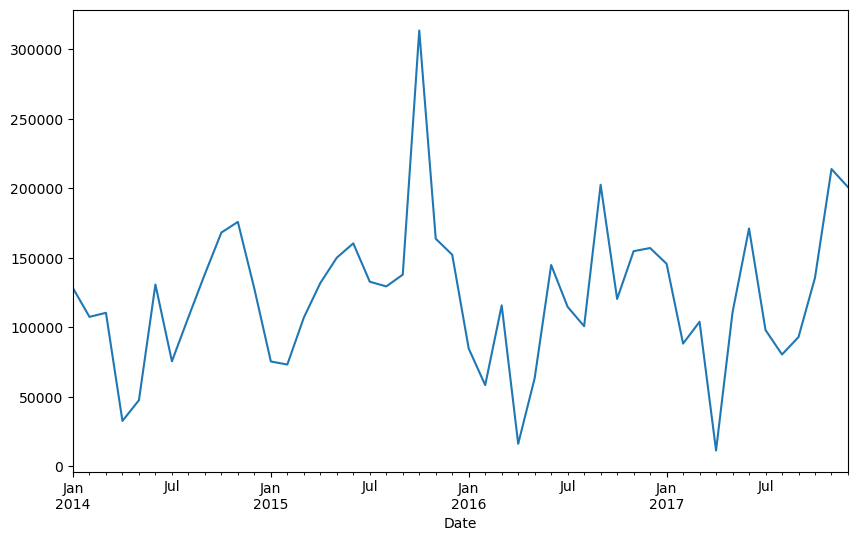

In [49]:
y_HR.plot(figsize=(10, 6))
plt.show()

In [50]:
y_HP=HP['VALUE'].resample('M').sum()
y_HP

Date
2014-01-31    21497.670
2014-02-28    12344.535
2014-03-31     2396.790
2014-04-30     6969.780
2014-05-31    10023.480
2014-06-30    18159.390
2014-07-31    14409.630
2014-08-31     7495.875
2014-09-30      165.375
2014-10-31    13826.835
2014-11-30    24801.930
2014-12-31    16783.740
2015-01-31    15356.250
2015-02-28     8318.295
2015-03-31    21547.080
2015-04-30    16622.820
2015-05-31     7457.400
2015-06-30    21232.530
2015-07-31    14526.675
2015-08-31    14110.470
2015-09-30    16156.800
2015-10-31    21325.950
2015-11-30    14076.855
2015-12-31    16709.220
2016-01-31     7311.870
2016-02-29    16147.485
2016-03-31    15161.580
2016-04-30     1407.780
2016-05-31    15280.110
2016-06-30    15497.595
2016-07-31    14288.805
2016-08-31     7198.335
2016-09-30    24069.150
2016-10-31    18596.250
2016-11-30    13007.385
2016-12-31    11162.610
2017-01-31    15490.440
2017-02-28    13960.000
2017-03-31    13960.000
2017-04-30     7897.095
2017-05-31    10102.455
2017-06-30 

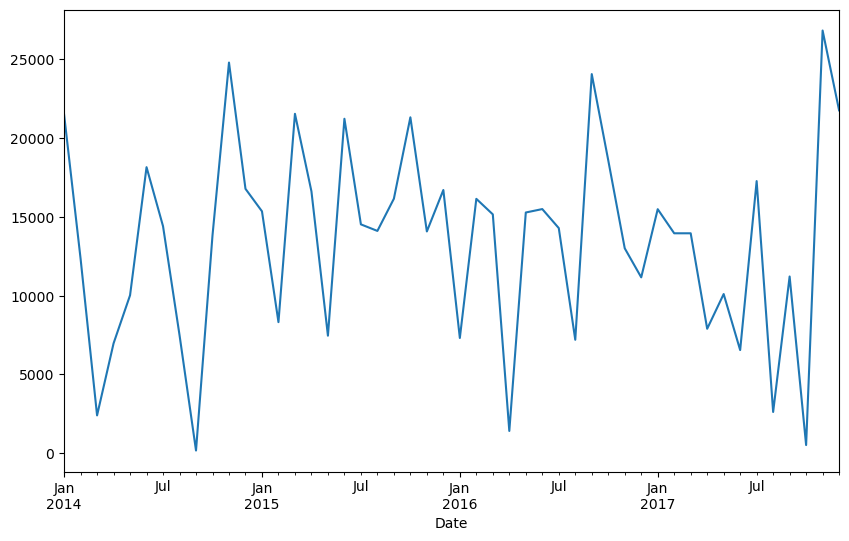

In [51]:
y_HP.plot(figsize=(10, 6))
plt.show()

Date
2014-01-31     817419.600
2014-02-28     662409.630
2014-03-31    1641843.540
2014-04-30     142695.000
2014-05-31     395083.710
2014-06-30     553862.070
2014-07-31     720928.080
2014-08-31    1103308.965
2014-09-30     752904.720
2014-10-31     708021.540
2014-11-30    1431476.820
2014-12-31    1049625.270
2015-01-31     789729.885
2015-02-28     541337.310
2015-03-31    2039066.595
2015-04-30     503665.560
2015-05-31     711111.285
2015-06-30     700414.290
2015-07-31     914662.530
2015-08-31     824892.660
2015-09-30     825032.385
2015-10-31     660813.660
2015-11-30     935888.850
2015-12-31     845433.045
2016-01-31     827758.980
2016-02-29     581322.015
2016-03-31    1414752.183
2016-04-30     239000.760
2016-05-31     572291.325
2016-06-30     531000.900
2016-07-31     567115.020
2016-08-31     737854.650
2016-09-30     597814.560
2016-10-31     405397.035
2016-11-30     907754.040
2016-12-31     831337.992
2017-01-31     734645.700
2017-02-28     408172.000
2017-03

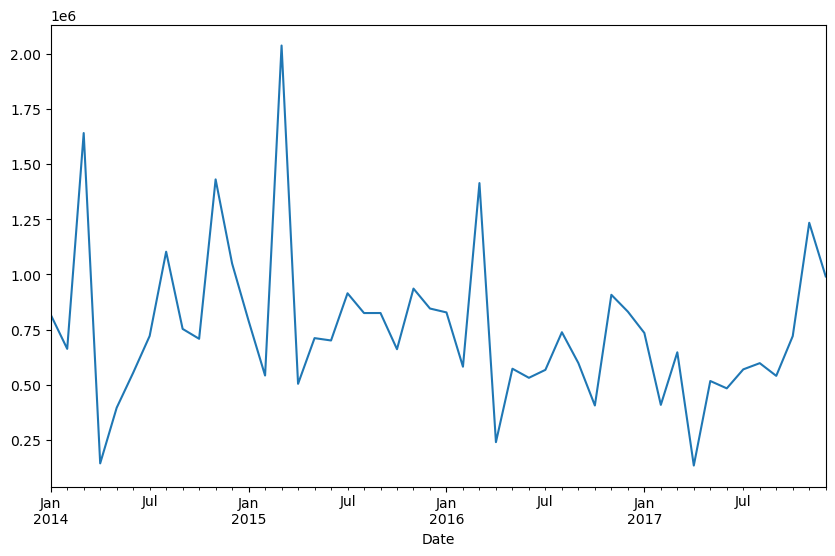

In [52]:
y_UP=UP['VALUE'].resample('M').sum()
print(y_UP)
y_UP.plot(figsize=(10, 6))
plt.show()

Date
2014-01-31    34961.355
2014-02-28    47755.305
2014-03-31    45034.380
2014-04-30    33580.710
2014-05-31    34247.070
2014-06-30    57970.215
2014-07-31    65174.895
2014-08-31    35574.525
2014-09-30    40954.545
2014-10-31    40054.230
2014-11-30    63983.655
2014-12-31    47099.070
2015-01-31    53344.980
2015-02-28    39875.490
2015-03-31    40543.065
2015-04-30    29367.900
2015-05-31    59180.490
2015-06-30    65231.460
2015-07-31    62417.115
2015-08-31    32468.850
2015-09-30    32484.510
2015-10-31    54838.890
2015-11-30    55205.820
2015-12-31    48965.715
2016-01-31    29767.635
2016-02-29    25739.100
2016-03-31    42775.155
2016-04-30    33555.735
2016-05-31    65009.790
2016-06-30    47139.975
2016-07-31    55507.680
2016-08-31    40305.735
2016-09-30    31906.305
2016-10-31    28755.135
2016-11-30    68877.270
2016-12-31    66366.405
2017-01-31    51922.350
2017-02-28    42859.000
2017-03-31    41816.000
2017-04-30    22535.820
2017-05-31    42045.075
2017-06-30 

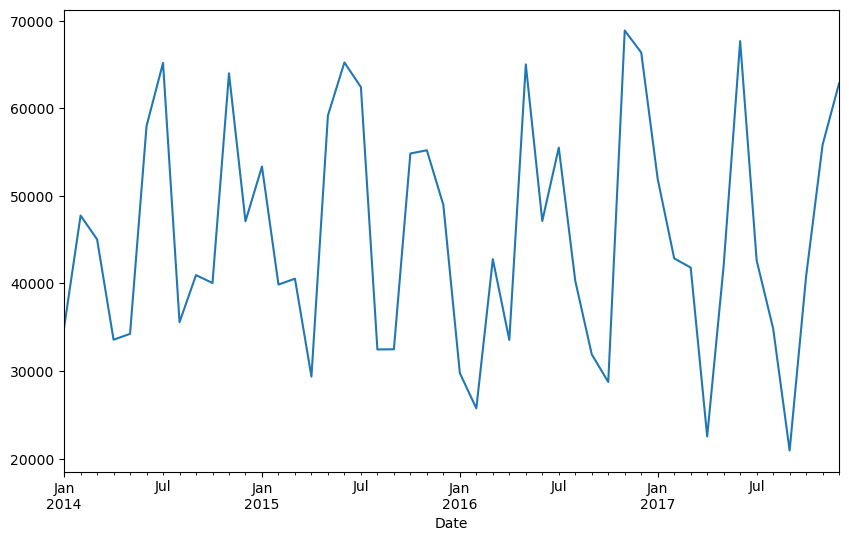

In [53]:
y_UK=UK['VALUE'].resample('M').sum()
print(y_UK)
y_UK.plot(figsize=(10, 6))
plt.show()

Date
2014-01-31    109526.175
2014-02-28    118257.165
2014-03-31     45239.580
2014-04-30    181633.185
2014-05-31    184528.935
2014-06-30    151493.085
2014-07-31     99722.475
2014-08-31    149691.915
2014-09-30    115486.965
2014-10-31    305785.800
2014-11-30    183920.490
2014-12-31    198224.280
2015-01-31    253721.835
2015-02-28    104799.285
2015-03-31    228154.725
2015-04-30    291320.955
2015-05-31    399479.040
2015-06-30    182901.105
2015-07-31    162270.135
2015-08-31    188838.945
2015-09-30    193174.470
2015-10-31    426452.310
2015-11-30    150497.730
2015-12-31    183275.190
2016-01-31     61821.630
2016-02-29    152025.525
2016-03-31    216319.815
2016-04-30     44783.685
2016-05-31    107567.190
2016-06-30    166298.940
2016-07-31    135769.500
2016-08-31    269317.980
2016-09-30    157380.570
2016-10-31    208027.170
2016-11-30    220494.015
2016-12-31    202958.730
2017-01-31     93745.890
2017-02-28    189698.000
2017-03-31    189698.000
2017-04-30     54139

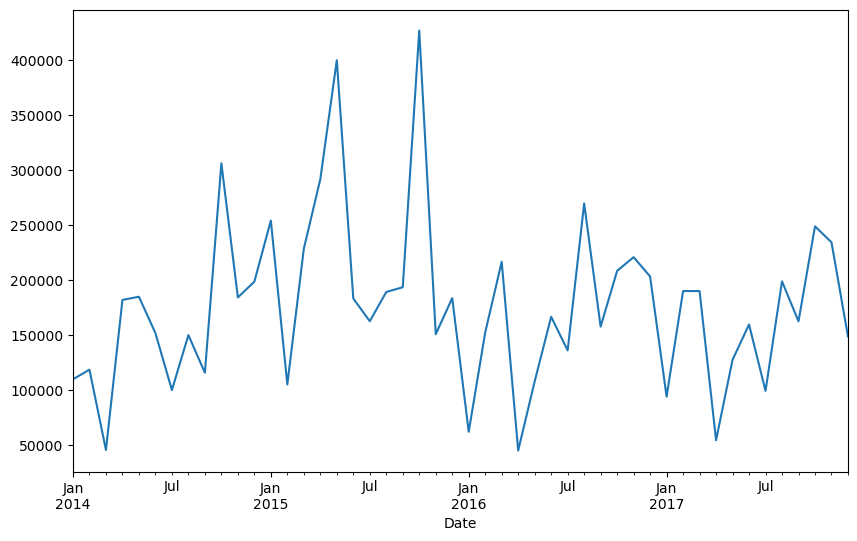

In [54]:
y_PB=PB['VALUE'].resample('M').sum()
print(y_PB)
y_PB.plot(figsize=(10, 6))
plt.show()

HR model

In [55]:
train_HR=y_HR.loc[:'2016-12-31']
print(train_HR.shape)
train_HR.tail()


(36,)


Date
2016-08-31    100687.320
2016-09-30    202416.975
2016-10-31    120286.890
2016-11-30    154636.020
2016-12-31    156926.565
Freq: M, Name: VALUE, dtype: float64

In [56]:
test_HR=y_HR.loc['2017-01-31':]
print(test_HR.shape)
test_HR.tail()

(12,)


Date
2017-08-31     80357.130
2017-09-30     92884.995
2017-10-31    135560.655
2017-11-30    213711.210
2017-12-31    200733.525
Freq: M, Name: VALUE, dtype: float64

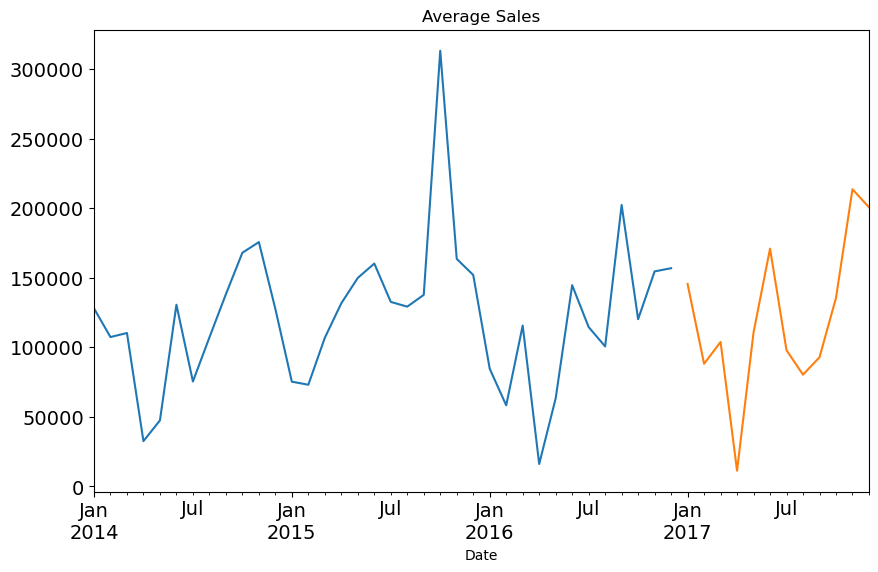

In [57]:
#Plotting data
train_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


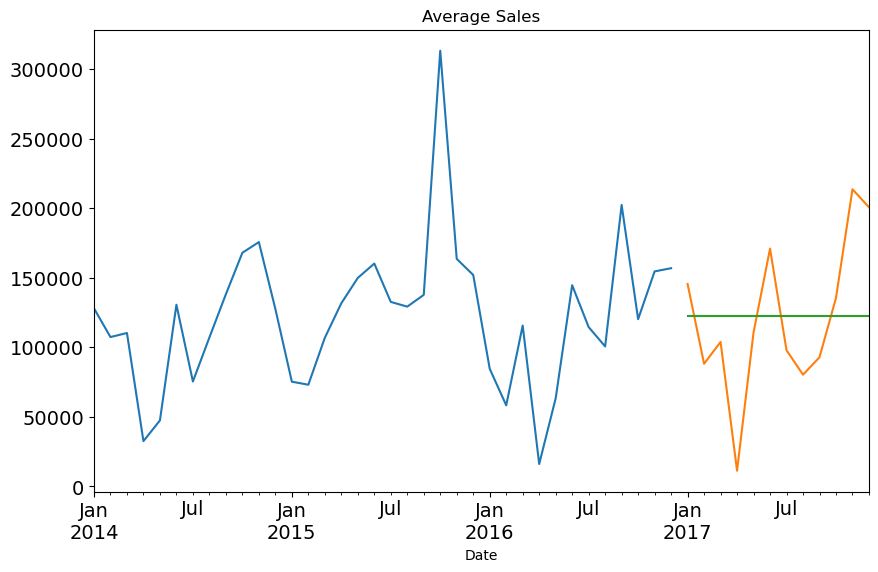

In [58]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test_HR.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train_HR).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test_HR))

train_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [59]:
Exp_Smooth.SES

2017-01-31    122566.616448
2017-02-28    122566.616448
2017-03-31    122566.616448
2017-04-30    122566.616448
2017-05-31    122566.616448
2017-06-30    122566.616448
2017-07-31    122566.616448
2017-08-31    122566.616448
2017-09-30    122566.616448
2017-10-31    122566.616448
2017-11-30    122566.616448
2017-12-31    122566.616448
Freq: M, dtype: float64

In [60]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

786.568752031872

In [61]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_HR, Exp_Smooth.SES))
print(rmse)

53836.56271495808


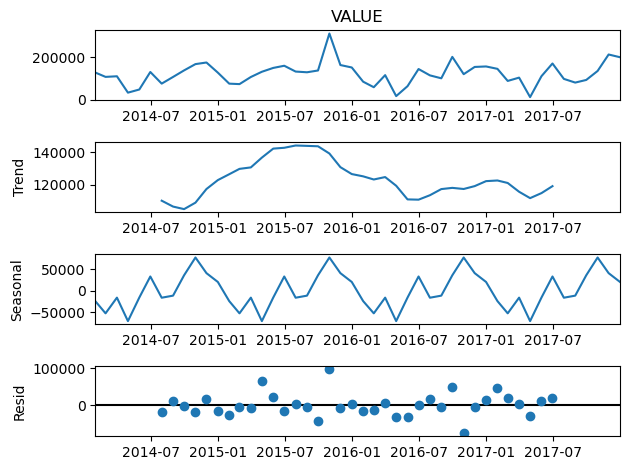

In [62]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y_HR)
fig = decomposition.plot()
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-63-058b66c9cafd>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train_HR).fit(smoothing_level = 0.1,smoothing_slope = 0.5)


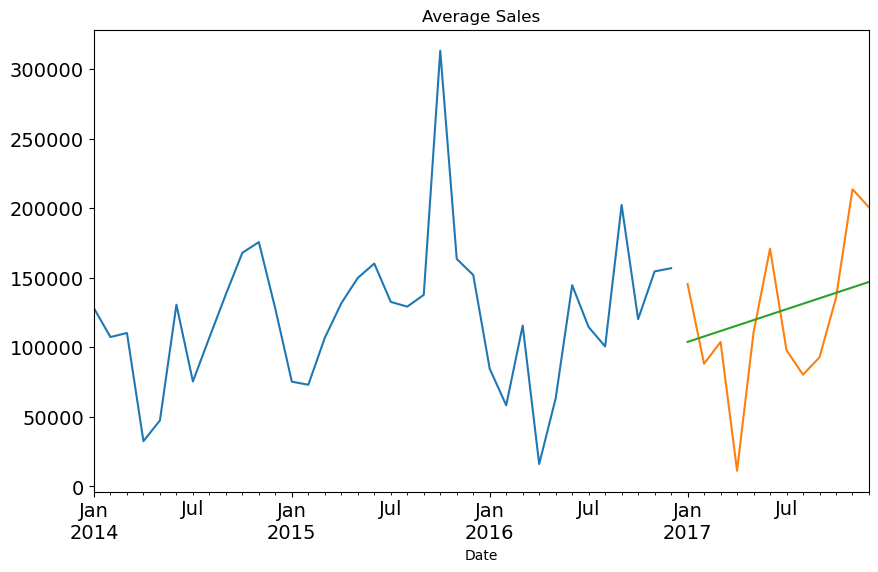

In [63]:
from statsmodels.tsa.api import Holt
Holt_df = test_HR.copy()
#soothing slope=beta
fit1 = Holt(train_HR).fit(smoothing_level = 0.1,smoothing_slope = 0.5)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test_HR))

train_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [64]:
"""
import numpy as np
for i in np.arange(0,1,0.01):
    for j in np.arange(0,1,0.01):
        from statsmodels.tsa.api import Holt
        Holt_df = test_HR.copy()
        #soothing slope=beta
        fit1 = Holt(train_HR).fit(smoothing_level = i,smoothing_slope = j)
        Holt_df['Holt_linear'] = fit1.forecast(len(test_HR))
        print(fit1.aic,i,j)
"""

"\nimport numpy as np\nfor i in np.arange(0,1,0.01):\n    for j in np.arange(0,1,0.01):\n        from statsmodels.tsa.api import Holt\n        Holt_df = test_HR.copy()\n        #soothing slope=beta\n        fit1 = Holt(train_HR).fit(smoothing_level = i,smoothing_slope = j)\n        Holt_df['Holt_linear'] = fit1.forecast(len(test_HR))\n        print(fit1.aic,i,j)\n"

In [65]:
fit1.aic

802.381689525394

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_HR,Holt_df['Holt_linear'] ))
print(rms)

48786.37408086463


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


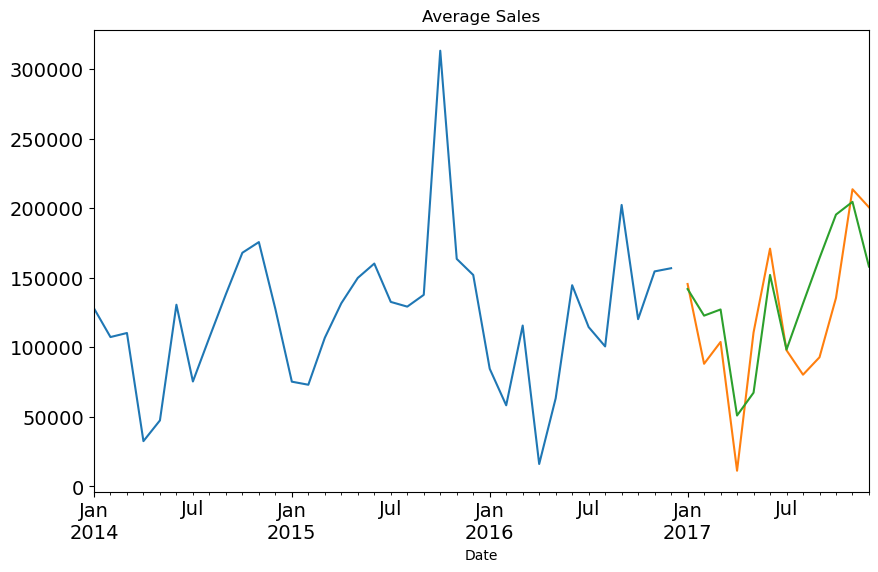

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test_HR.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train_HR ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test_HR))

train_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HR.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_HR, Holt_Winter_df['Holt_Winter']))
print(rms)

39542.65883715972


In [69]:
Holt_Winter_df['Holt_Winter']

2017-01-31    141973.287642
2017-02-28    122829.545101
2017-03-31    127259.847528
2017-04-30     51006.315482
2017-05-31     67416.920356
2017-06-30    152112.494560
2017-07-31     98408.417958
2017-08-31    131578.469228
2017-09-30    164174.184320
2017-10-31    195493.420842
2017-11-30    204649.098053
2017-12-31    158107.731886
Freq: M, dtype: float64

HP model

In [70]:
train_HP=y_HP.loc[:'2016-12-31']
print(train_HP.shape)
train_HP.tail()


(36,)


Date
2016-08-31     7198.335
2016-09-30    24069.150
2016-10-31    18596.250
2016-11-30    13007.385
2016-12-31    11162.610
Freq: M, Name: VALUE, dtype: float64

In [71]:
test_HP=y_HP.loc['2017-01-31':]
print(test_HP.shape)
test_HP.tail()

(12,)


Date
2017-08-31     2613.465
2017-09-30    11216.475
2017-10-31      512.595
2017-11-30    26836.380
2017-12-31    21768.750
Freq: M, Name: VALUE, dtype: float64

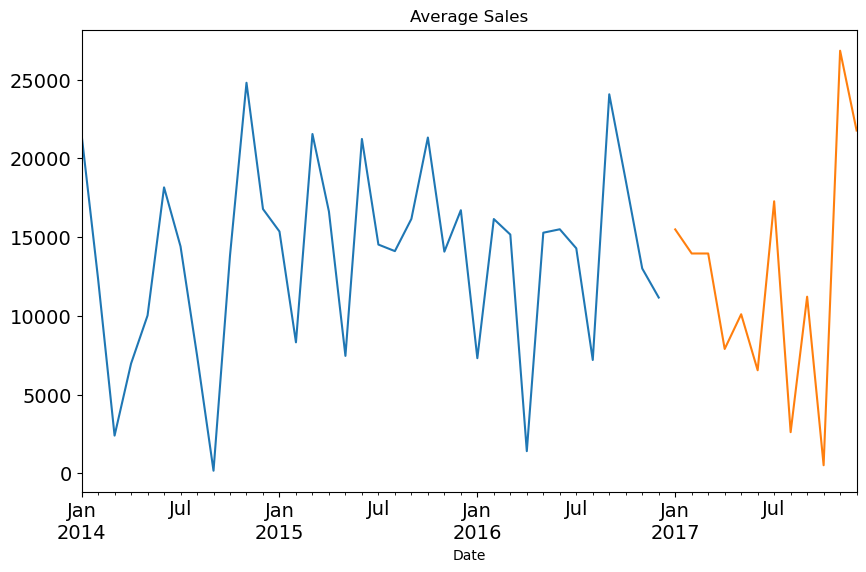

In [72]:
#Plotting data
train_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


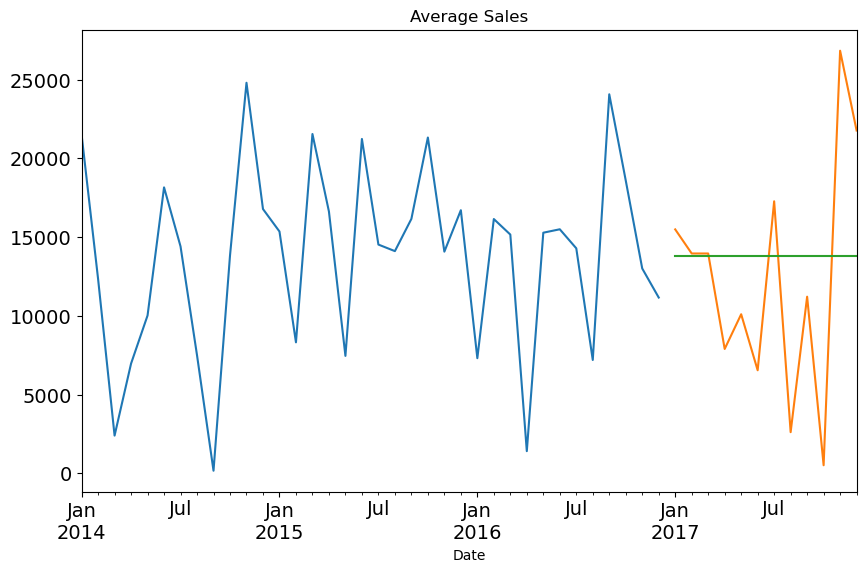

In [73]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test_HP.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train_HP).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test_HP))

train_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [74]:
Exp_Smooth.SES

2017-01-31    13772.306459
2017-02-28    13772.306459
2017-03-31    13772.306459
2017-04-30    13772.306459
2017-05-31    13772.306459
2017-06-30    13772.306459
2017-07-31    13772.306459
2017-08-31    13772.306459
2017-09-30    13772.306459
2017-10-31    13772.306459
2017-11-30    13772.306459
2017-12-31    13772.306459
Freq: M, dtype: float64

In [75]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

630.3347636346901

In [76]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_HP, Exp_Smooth.SES))
print(rmse)

7399.424352686685


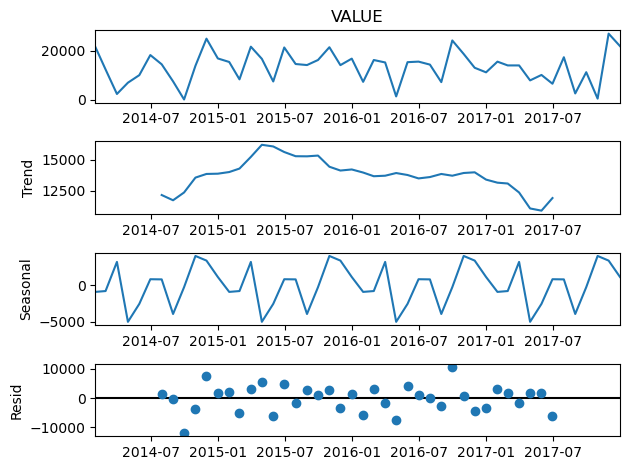

In [77]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y_HP)
fig = decomposition.plot()
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-78-ccac94d84768>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train_HP).fit(smoothing_level = 0.1,smoothing_slope = 0.2)


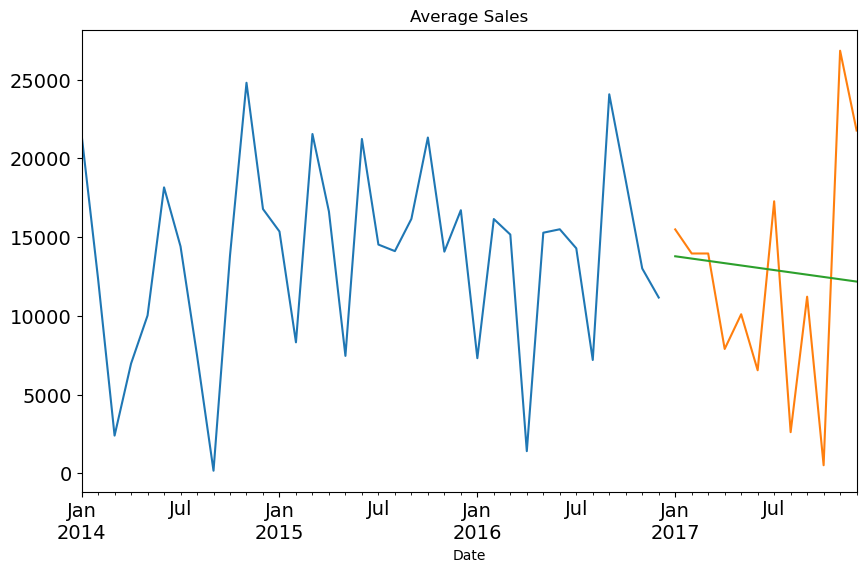

In [78]:
from statsmodels.tsa.api import Holt
Holt_df = test_HP.copy()
#soothing slope=beta
fit1 = Holt(train_HP).fit(smoothing_level = 0.1,smoothing_slope = 0.2)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test_HP))

train_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [79]:
fit1.aic

638.7558409023251

In [80]:
Holt_df['Holt_linear']

2017-01-31    13783.343634
2017-02-28    13637.372263
2017-03-31    13491.400893
2017-04-30    13345.429522
2017-05-31    13199.458151
2017-06-30    13053.486781
2017-07-31    12907.515410
2017-08-31    12761.544040
2017-09-30    12615.572669
2017-10-31    12469.601299
2017-11-30    12323.629928
2017-12-31    12177.658558
Freq: M, dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_HP,Holt_df['Holt_linear'] ))
print(rms)

7385.164894277243


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


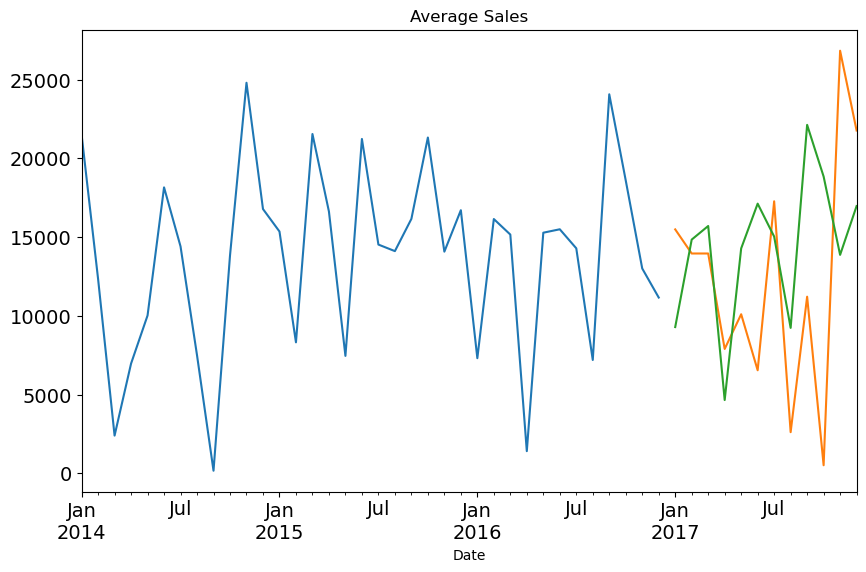

In [82]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test_HP.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train_HP ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test_HP))

train_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_HP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_HP, Holt_Winter_df['Holt_Winter']))
print(rms)

8551.107703414678


In [84]:
Holt_Winter_df['Holt_Winter']

2017-01-31     9288.084023
2017-02-28    14842.082667
2017-03-31    15705.744258
2017-04-30     4654.405155
2017-05-31    14282.688556
2017-06-30    17125.434586
2017-07-31    15036.016842
2017-08-31     9236.297196
2017-09-30    22128.634468
2017-10-31    18847.739196
2017-11-30    13872.468312
2017-12-31    16972.449112
Freq: M, dtype: float64

Punjab Model

In [85]:
train_PB=y_PB.loc[:'2016-12-31']
print(train_PB.shape)
train_PB.tail()


(36,)


Date
2016-08-31    269317.980
2016-09-30    157380.570
2016-10-31    208027.170
2016-11-30    220494.015
2016-12-31    202958.730
Freq: M, Name: VALUE, dtype: float64

In [86]:
test_PB=y_PB.loc['2017-01-31':]
print(test_PB.shape)
test_PB.tail()

(12,)


Date
2017-08-31    198493.335
2017-09-30    162217.890
2017-10-31    248477.085
2017-11-30    234001.035
2017-12-31    148460.850
Freq: M, Name: VALUE, dtype: float64

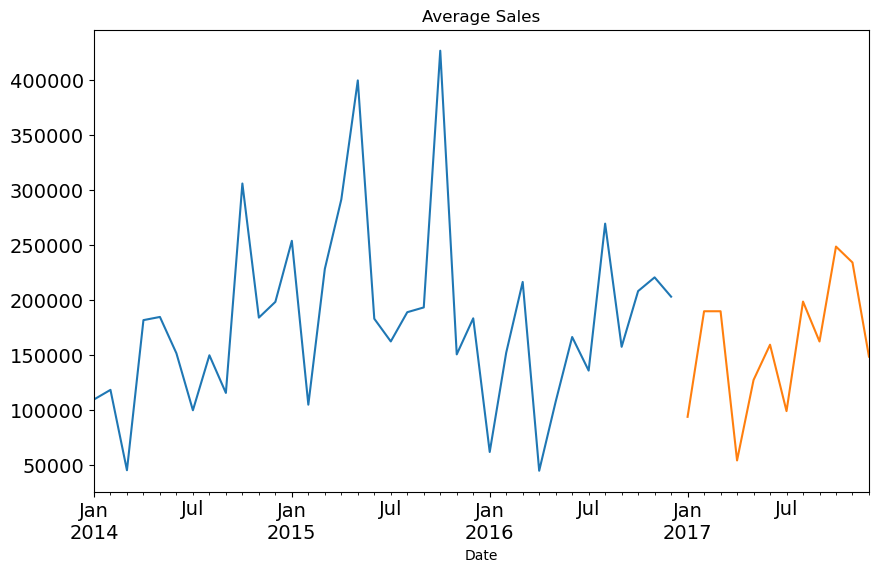

In [87]:
#Plotting data
train_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


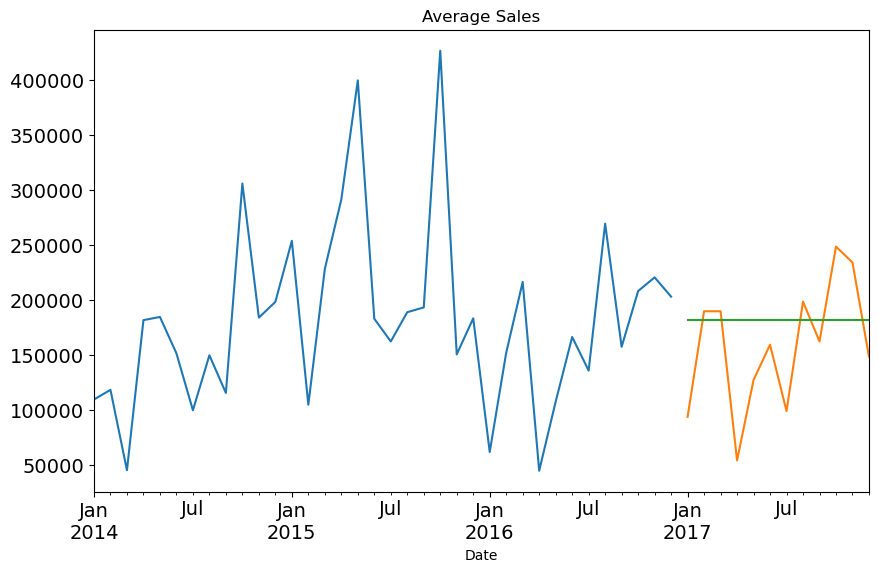

In [88]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test_PB.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train_PB).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test_PB))

train_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [89]:
Exp_Smooth.SES

2017-01-31    182057.942571
2017-02-28    182057.942571
2017-03-31    182057.942571
2017-04-30    182057.942571
2017-05-31    182057.942571
2017-06-30    182057.942571
2017-07-31    182057.942571
2017-08-31    182057.942571
2017-09-30    182057.942571
2017-10-31    182057.942571
2017-11-30    182057.942571
2017-12-31    182057.942571
Freq: M, dtype: float64

In [90]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

819.3632257782754

In [91]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_PB, Exp_Smooth.SES))
print(rmse)

60287.609356418034


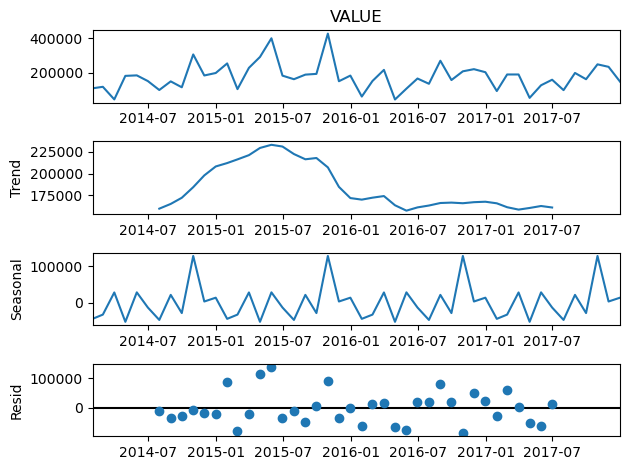

In [92]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y_PB)
fig = decomposition.plot()
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-93-c9a8ddfbb24b>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train_PB).fit(smoothing_level = 0.11,smoothing_slope = 0.45)


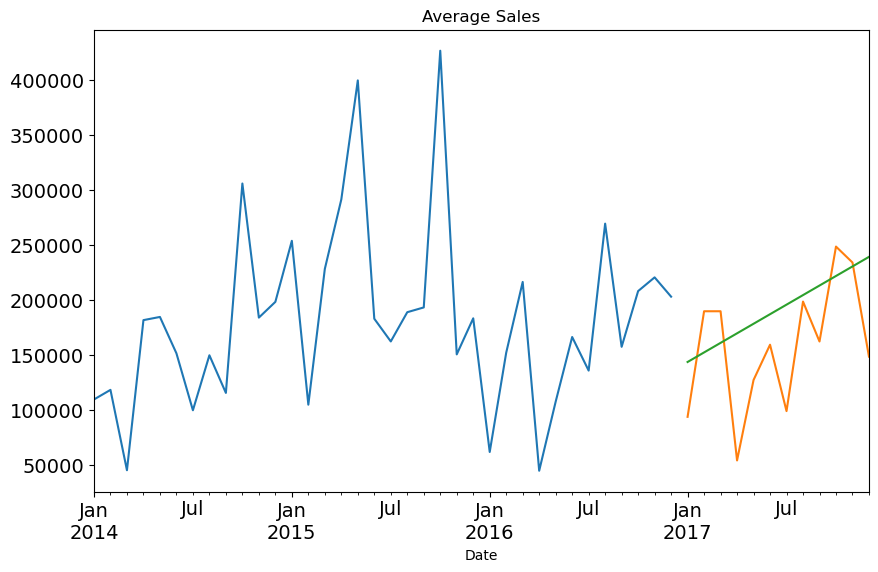

In [93]:
from statsmodels.tsa.api import Holt
Holt_df = test_PB.copy()
#soothing slope=beta
fit1 = Holt(train_PB).fit(smoothing_level = 0.11,smoothing_slope = 0.45)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test_PB))

train_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [94]:
fit1.aic

830.480523257555

In [95]:
Holt_df['Holt_linear']

2017-01-31    143597.038421
2017-02-28    152280.492206
2017-03-31    160963.945992
2017-04-30    169647.399778
2017-05-31    178330.853563
2017-06-30    187014.307349
2017-07-31    195697.761134
2017-08-31    204381.214920
2017-09-30    213064.668705
2017-10-31    221748.122491
2017-11-30    230431.576276
2017-12-31    239115.030062
Freq: M, dtype: float64

In [96]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_PB,Holt_df['Holt_linear'] ))
print(rms)

59414.615017099655


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


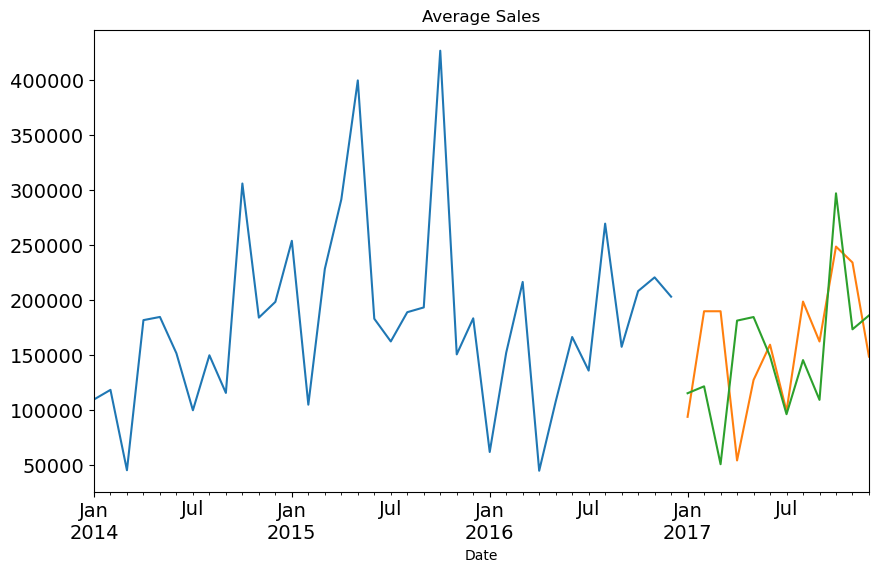

In [97]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test_PB.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train_PB ,seasonal_periods=12,
                            trend="add",
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test_PB))

train_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_PB.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [98]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_PB, Holt_Winter_df['Holt_Winter']))
print(rms)

68945.78967806505


In [99]:
Holt_Winter_df['Holt_Winter']

2017-01-31    115203.304655
2017-02-28    121478.479796
2017-03-31     50698.211545
2017-04-30    181187.725397
2017-05-31    184444.118491
2017-06-30    148822.295992
2017-07-31     96151.749802
2017-08-31    145312.415307
2017-09-30    109159.295628
2017-10-31    296854.167345
2017-11-30    173284.553629
2017-12-31    185912.475654
Freq: M, dtype: float64

UP Model

In [100]:
train_UP=y_UP.loc[:'2016-12-31']
print(train_UP.shape)
train_UP.tail()


(36,)


Date
2016-08-31    737854.650
2016-09-30    597814.560
2016-10-31    405397.035
2016-11-30    907754.040
2016-12-31    831337.992
Freq: M, Name: VALUE, dtype: float64

In [101]:
test_UP=y_UP.loc['2017-01-31':]
print(test_UP.shape)
test_UP.tail()

(12,)


Date
2017-08-31     597466.935
2017-09-30     539775.090
2017-10-31     720295.875
2017-11-30    1234663.965
2017-12-31     991006.515
Freq: M, Name: VALUE, dtype: float64

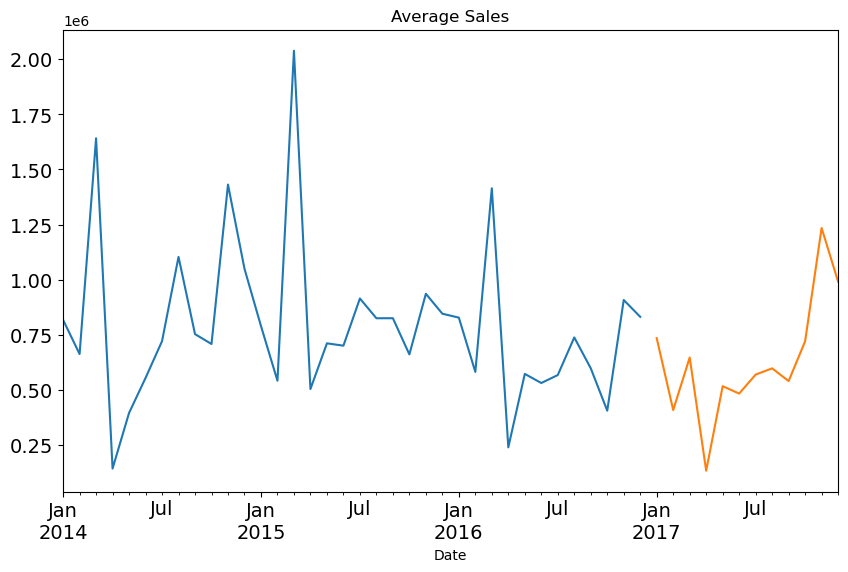

In [102]:
#Plotting data
train_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


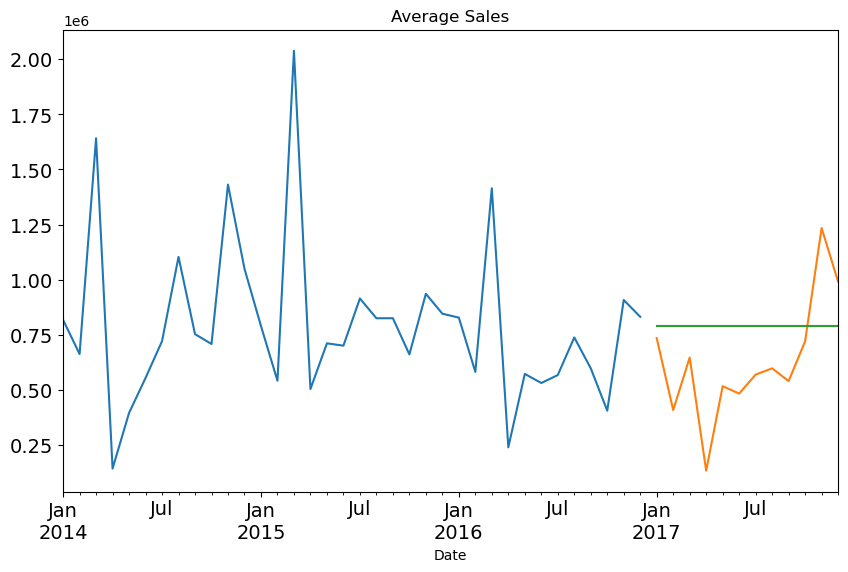

In [103]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test_UP.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train_UP).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test_UP))

train_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [104]:
Exp_Smooth.SES

2017-01-31    789959.833137
2017-02-28    789959.833137
2017-03-31    789959.833137
2017-04-30    789959.833137
2017-05-31    789959.833137
2017-06-30    789959.833137
2017-07-31    789959.833137
2017-08-31    789959.833137
2017-09-30    789959.833137
2017-10-31    789959.833137
2017-11-30    789959.833137
2017-12-31    789959.833137
Freq: M, dtype: float64

In [105]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

926.8715183249936

In [106]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_UP, Exp_Smooth.SES))
print(rmse)

311098.3707522765


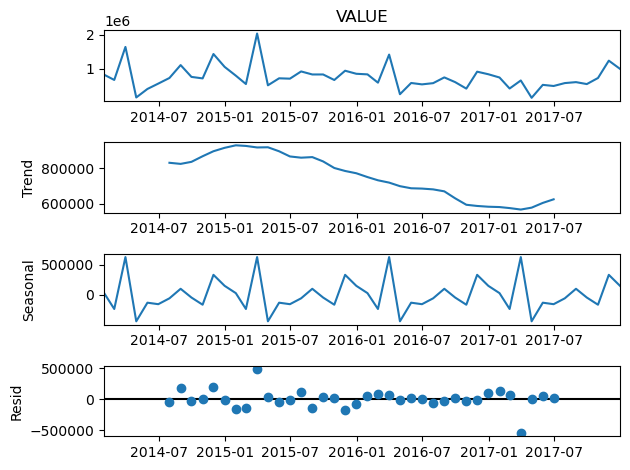

In [107]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y_UP)
fig = decomposition.plot()
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-108-9902d9166d2f>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train_UP).fit(smoothing_level = 0.1,smoothing_slope = 0.65)


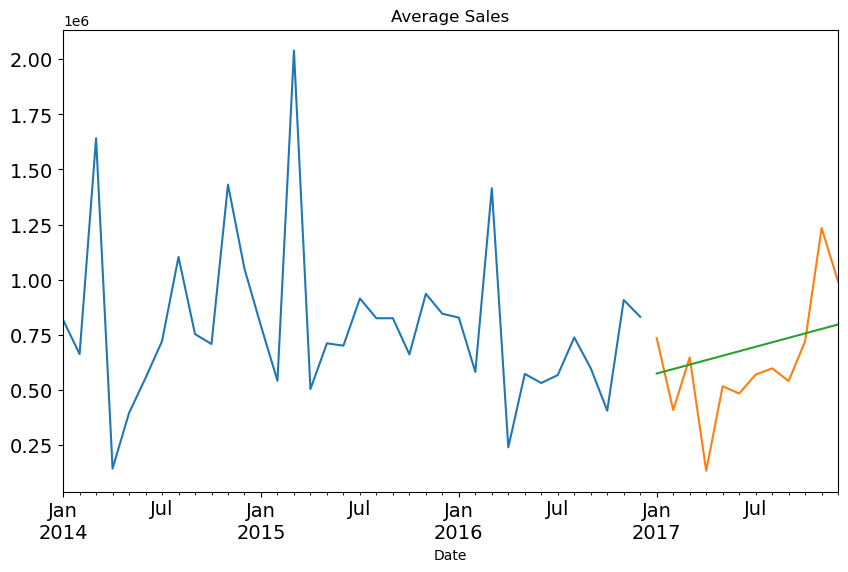

In [108]:
from statsmodels.tsa.api import Holt
Holt_df = test_UP.copy()
#soothing slope=beta
fit1 = Holt(train_UP).fit(smoothing_level = 0.1,smoothing_slope = 0.65)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test_UP))

train_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [109]:
fit1.aic

936.7186059803036

In [110]:
Holt_df['Holt_linear']

2017-01-31    573967.279249
2017-02-28    594207.759436
2017-03-31    614448.239623
2017-04-30    634688.719810
2017-05-31    654929.199997
2017-06-30    675169.680184
2017-07-31    695410.160372
2017-08-31    715650.640559
2017-09-30    735891.120746
2017-10-31    756131.600933
2017-11-30    776372.081120
2017-12-31    796612.561307
Freq: M, dtype: float64

In [111]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_UP,Holt_df['Holt_linear'] ))
print(rms)

239228.3995666029


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


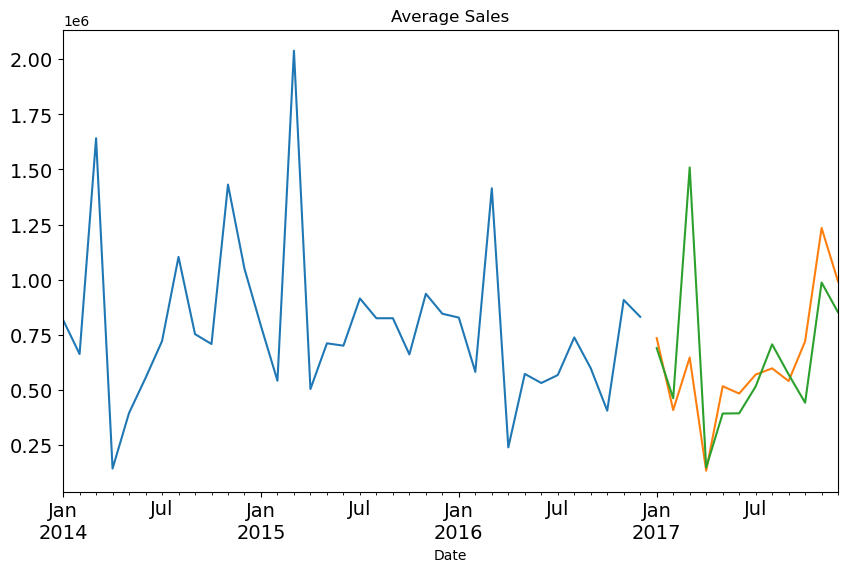

In [112]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test_UP.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train_UP ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test_UP))

train_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UP.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_UP, Holt_Winter_df['Holt_Winter']))
print(rms)

280877.3105603763


In [114]:
Holt_Winter_df['Holt_Winter']

2017-01-31    6.896177e+05
2017-02-28    4.616887e+05
2017-03-31    1.509260e+06
2017-04-30    1.472429e+05
2017-05-31    3.925455e+05
2017-06-30    3.933901e+05
2017-07-31    5.151635e+05
2017-08-31    7.065896e+05
2017-09-30    5.697761e+05
2017-10-31    4.415555e+05
2017-11-30    9.870187e+05
2017-12-31    8.513185e+05
Freq: M, dtype: float64

UK Model

In [115]:
train_UK=y_UK.loc[:'2016-12-31']
print(train_UK.shape)
train_UK.tail()


(36,)


Date
2016-08-31    40305.735
2016-09-30    31906.305
2016-10-31    28755.135
2016-11-30    68877.270
2016-12-31    66366.405
Freq: M, Name: VALUE, dtype: float64

In [116]:
test_UK=y_UK.loc['2017-01-31':]
print(test_UK.shape)
test_UK.tail()

(12,)


Date
2017-08-31    34859.835
2017-09-30    20928.105
2017-10-31    40825.080
2017-11-30    55837.890
2017-12-31    62852.625
Freq: M, Name: VALUE, dtype: float64

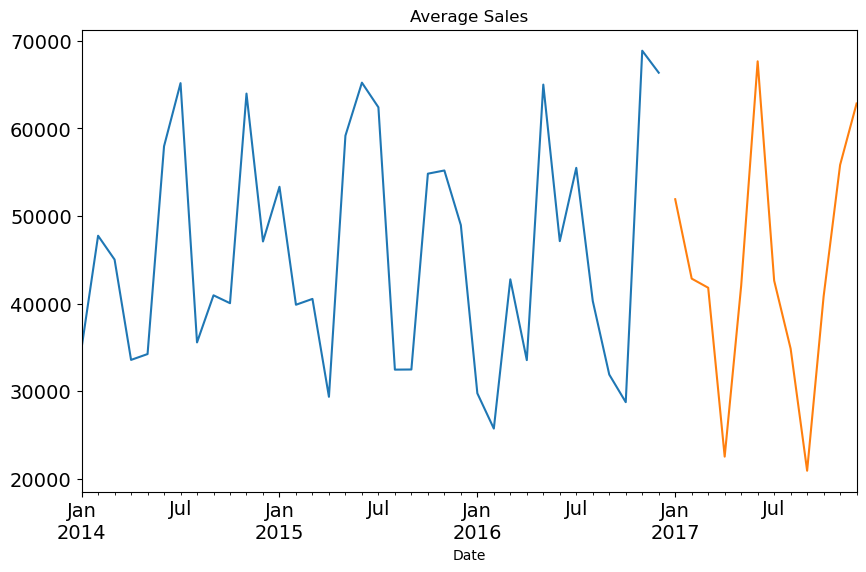

In [117]:
#Plotting data
train_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


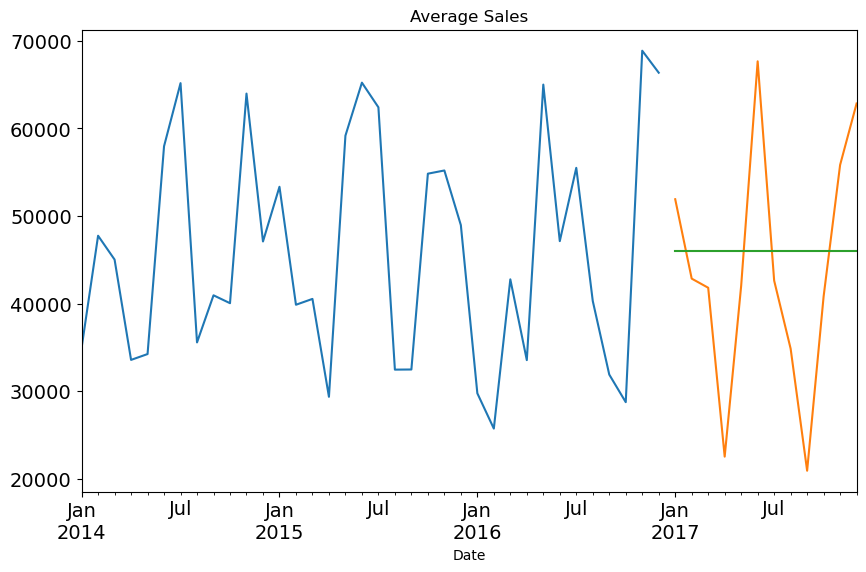

In [118]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test_UK.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train_UK).fit(smoothing_level=0.01)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test_UK))

train_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [119]:
Exp_Smooth.SES

2017-01-31    46020.93191
2017-02-28    46020.93191
2017-03-31    46020.93191
2017-04-30    46020.93191
2017-05-31    46020.93191
2017-06-30    46020.93191
2017-07-31    46020.93191
2017-08-31    46020.93191
2017-09-30    46020.93191
2017-10-31    46020.93191
2017-11-30    46020.93191
2017-12-31    46020.93191
Freq: M, dtype: float64

In [120]:
#AIC is used to compare different models with same Algo but different data/parameters
#choose the model with lowest AIC value
fit1.aic

685.4701938118092

In [121]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_UK, Exp_Smooth.SES))
print(rmse)

13756.347133557074


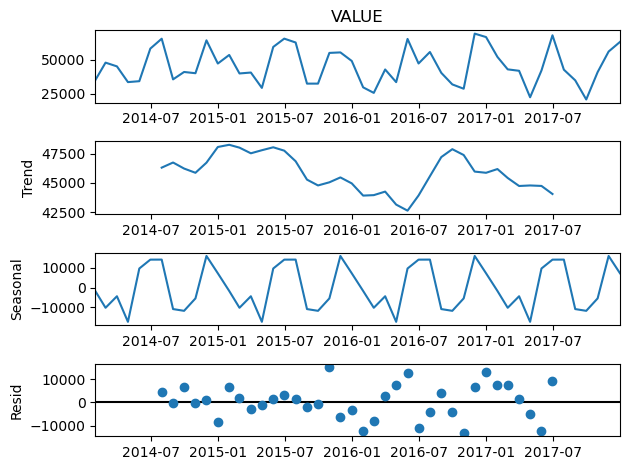

In [122]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y_UK)
fig = decomposition.plot()
plt.show()

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-123-e6a4d92582a2>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(train_UK).fit(smoothing_level = 0.05,smoothing_slope = 0.45)


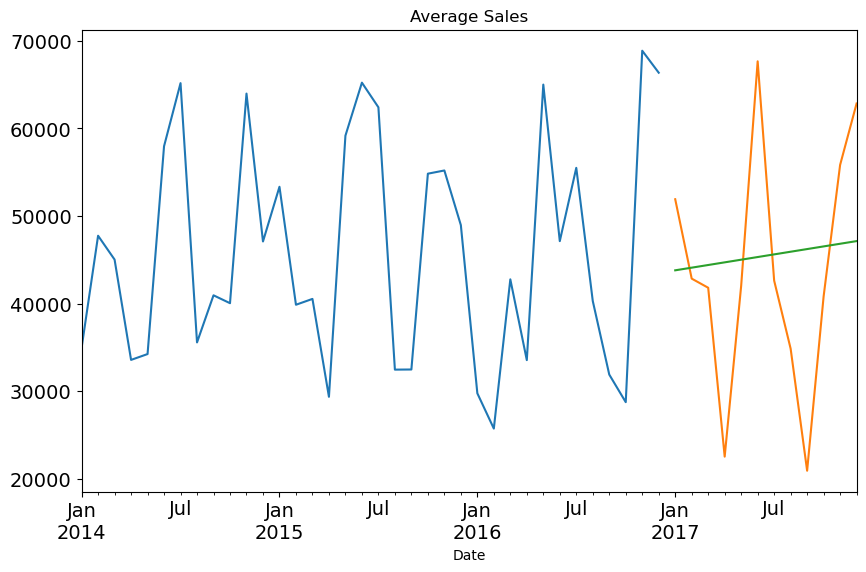

In [123]:
from statsmodels.tsa.api import Holt
Holt_df = test_UK.copy()
#soothing slope=beta
fit1 = Holt(train_UK).fit(smoothing_level = 0.05,smoothing_slope = 0.45)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test_UK))

train_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [124]:
fit1.aic

693.6352348574715

In [125]:
Holt_df['Holt_linear']

2017-01-31    43807.004271
2017-02-28    44110.257593
2017-03-31    44413.510915
2017-04-30    44716.764237
2017-05-31    45020.017559
2017-06-30    45323.270881
2017-07-31    45626.524203
2017-08-31    45929.777525
2017-09-30    46233.030847
2017-10-31    46536.284169
2017-11-30    46839.537491
2017-12-31    47142.790813
Freq: M, dtype: float64

In [126]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_UK,Holt_df['Holt_linear'] ))
print(rms)

13560.201478412286


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


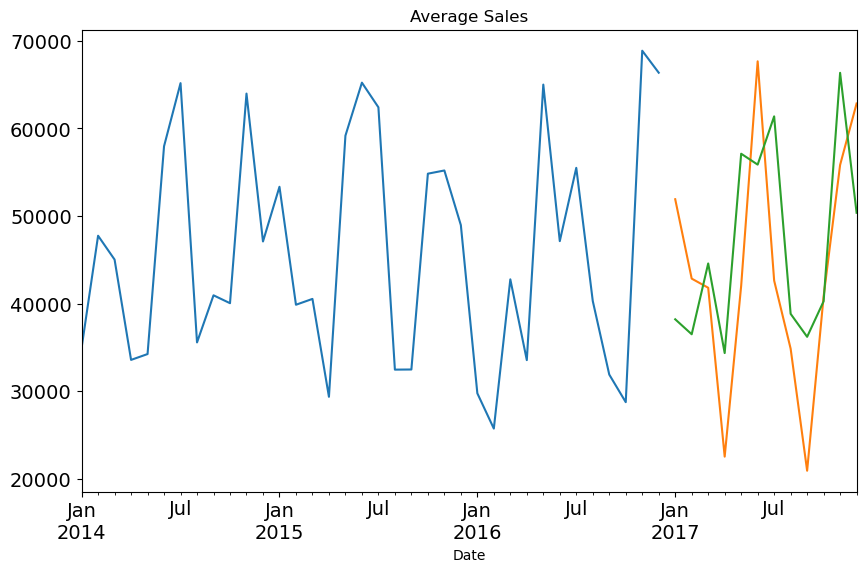

In [127]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test_UK.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train_UK ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test_UK))

train_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test_UK.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test_UK, Holt_Winter_df['Holt_Winter']))
print(rms)

11582.12838776308


In [129]:
Holt_Winter_df['Holt_Winter']

2017-01-31    38215.560519
2017-02-28    36506.230721
2017-03-31    44590.166773
2017-04-30    34361.340657
2017-05-31    57117.032926
2017-06-30    55874.217827
2017-07-31    61384.844978
2017-08-31    38839.315178
2017-09-30    36215.498737
2017-10-31    40272.406360
2017-11-30    66355.642121
2017-12-31    50375.283713
Freq: M, dtype: float64

In [130]:
pip install pmdarima --user

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


### ARIMA 

In [131]:
import pmdarima as pm

### Haryana

In [132]:
model = pm.auto_arima(y_HR,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1171.036, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1169.912, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1166.378, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1169.078, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1165.890, Time=0.04 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1166.683, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1168.151, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1166.859, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1165.765, Time=0.05 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1167.097, Time=0.06 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1166.558, Time=0.06 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=1167.311, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1167.546, Time=0.06 sec
 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=1165.890, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0

In [133]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [134]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y_HR,
                order=(1,1,1),seasonal_order=(0,0,0,12)).fit()

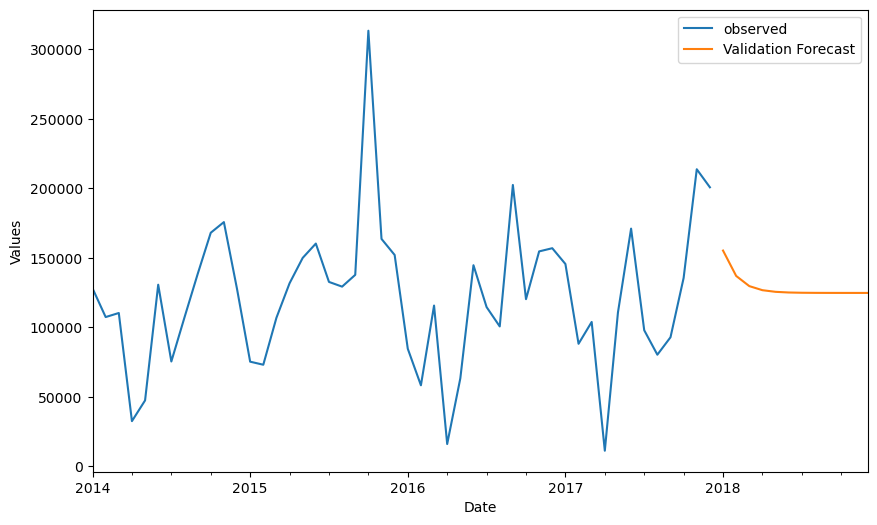

In [148]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12) #--->prediction

plt.figure(figsize=(10,6))
ax = y_HR['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

In [149]:
pred.predicted_mean

2018-01-31    155238.788932
2018-02-28    136991.769329
2018-03-31    129673.258372
2018-04-30    126737.951468
2018-05-31    125560.659165
2018-06-30    125088.471004
2018-07-31    124899.085871
2018-08-31    124823.127320
2018-09-30    124792.661880
2018-10-31    124780.442807
2018-11-30    124775.541984
2018-12-31    124773.576363
Freq: M, Name: predicted_mean, dtype: float64

In [150]:
Y_pred_HR = pred.predicted_mean
Y_test_HR = y_HR['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test_HR,Y_pred_HR))
print(rms)

55006.98393694698


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


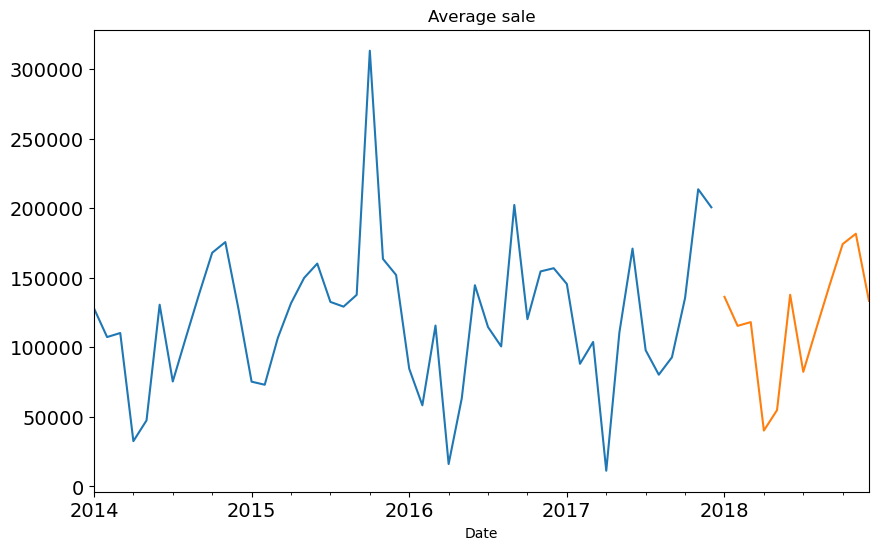

In [151]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=Gamma
fit1=ExponentialSmoothing(y_HR,seasonal_periods=12,
                         trend='add',
                         seasonal='add').fit()
y_predictions_HR=fit1.forecast(steps=12)

y_HR.plot(figsize=(10,6),title='Average sale',fontsize=14)
y_predictions_HR.plot(figsize=(10,6),title='Average sale',fontsize=14)
plt.show()

In [152]:
y_predictions_HR

2018-01-31    136350.626096
2018-02-28    115471.803868
2018-03-31    118173.066675
2018-04-30     40188.777803
2018-05-31     54879.479846
2018-06-30    137843.376514
2018-07-31     82407.250077
2018-08-31    113842.856219
2018-09-30    144706.751226
2018-10-31    174298.150173
2018-11-30    181731.843006
2018-12-31    133457.468464
Freq: M, dtype: float64

### Himachal pradesh

In [136]:
model_HP = pm.auto_arima(y_HP,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=991.767, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=984.696, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=989.778, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=982.803, Time=0.02 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=984.629, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=986.423, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=980.061, Time=0.03 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=982.052, Time=0.08 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=982.049, Time=0.06 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=984.011, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=969.269, Time=0.05 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=971.219, Time=0.09 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=971.166, Time=0.08 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   

In [137]:
from statsmodels.tsa.arima.model import ARIMA
model_HP = ARIMA(y_HR,
                order=(3,1,1),seasonal_order=(0,0,0,12)).fit()

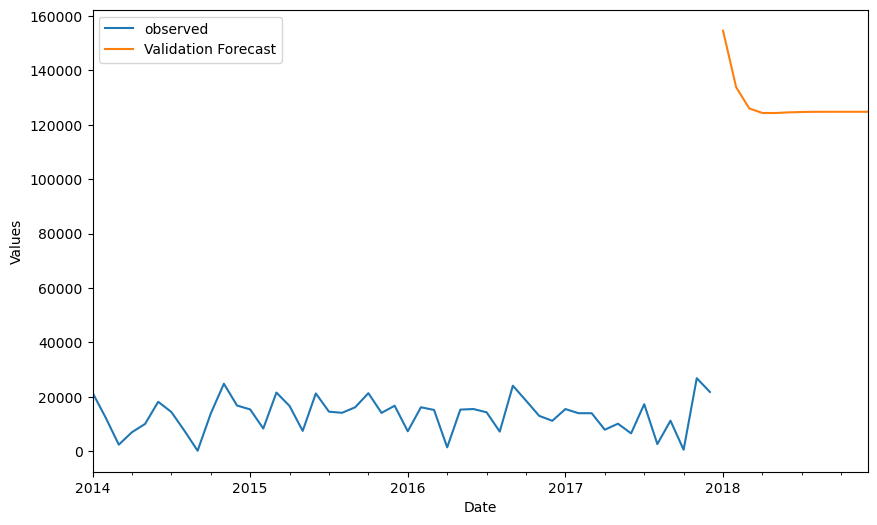

In [163]:

pred_HP = model_HP.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y_HP['2014':].plot(label='observed')
pred_HP.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

In [162]:
pred_HP.predicted_mean

2018-01-31    154620.061568
2018-02-28    133822.577764
2018-03-31    126025.454963
2018-04-30    124365.605497
2018-05-31    124355.697497
2018-06-30    124593.453822
2018-07-31    124739.092312
2018-08-31    124797.003939
2018-09-30    124812.539976
2018-10-31    124814.166074
2018-11-30    124813.012346
2018-12-31    124812.073731
Freq: M, Name: predicted_mean, dtype: float64

In [153]:
Y_pred_HP = pred_HP.predicted_mean
Y_test_HP = y_HP['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test_HP,Y_pred_HP))
print(rms)

116148.95105298088


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


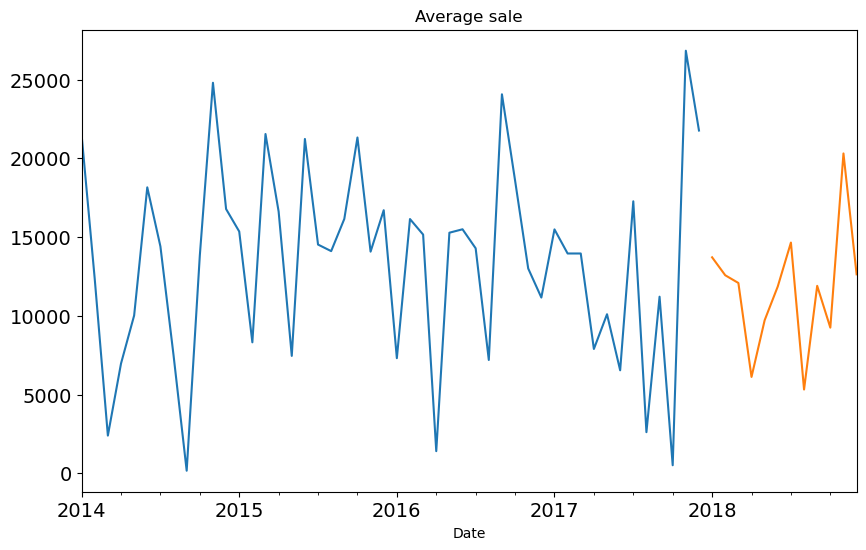

In [154]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=Gamma
fit1=ExponentialSmoothing(y_HP,seasonal_periods=12,
                         trend='add',
                         seasonal='add').fit()
y_predictions_HP=fit1.forecast(steps=12)

y_HP.plot(figsize=(10,6),title='Average sale',fontsize=14)
y_predictions_HP.plot(figsize=(10,6),title='Average sale',fontsize=14)
plt.show()

In [155]:
y_predictions_HP

2018-01-31    13717.157656
2018-02-28    12577.585365
2018-03-31    12087.519640
2018-04-30     6120.964706
2018-05-31     9720.517323
2018-06-30    11868.276409
2018-07-31    14654.452963
2018-08-31     5322.452746
2018-09-30    11906.166720
2018-10-31     9250.446372
2018-11-30    20313.408002
2018-12-31    12636.573726
Freq: M, dtype: float64

### Punjab

In [156]:
model_PB = pm.auto_arima(y_PB,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1221.787, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1211.470, Time=0.06 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1202.307, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1219.800, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1203.195, Time=0.02 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1204.167, Time=0.13 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1204.187, Time=0.33 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1202.809, Time=0.09 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1206.162, Time=0.29 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1218.666, Time=0.07 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=1204.305, Time=0.12 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=1205.205, Time=0.07 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=1210.986, Time=0.06 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=1206.030, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1

In [158]:
from statsmodels.tsa.arima.model import ARIMA
model_PB = ARIMA(y_PB,
                order=(0,1,1),seasonal_order=(0,0,1,12)).fit()

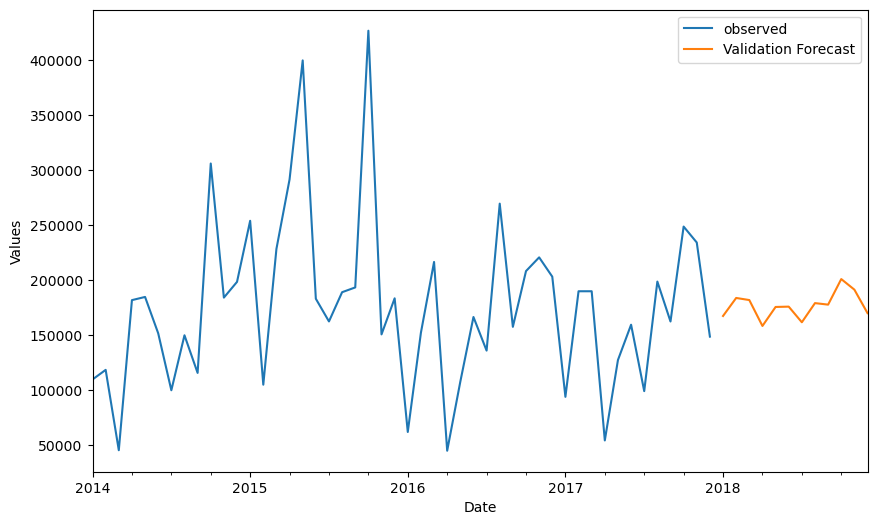

In [160]:

pred_PB = model_PB.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y_PB['2014':].plot(label='observed')
pred_PB.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

In [164]:
pred_PB.predicted_mean

2018-01-31    167232.326451
2018-02-28    183607.073202
2018-03-31    181696.615311
2018-04-30    158160.576899
2018-05-31    175419.612700
2018-06-30    175721.788086
2018-07-31    161503.804233
2018-08-31    178923.921587
2018-09-30    177541.017022
2018-10-31    200771.759418
2018-11-30    191150.656366
2018-12-31    169790.089595
Freq: M, Name: predicted_mean, dtype: float64

In [166]:
Y_pred_PB = pred_PB.predicted_mean
Y_test_PB = y_PB['2017-01-31':]

from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(Y_test_PB,Y_pred_PB))
print(rms)

48316.61590158933


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


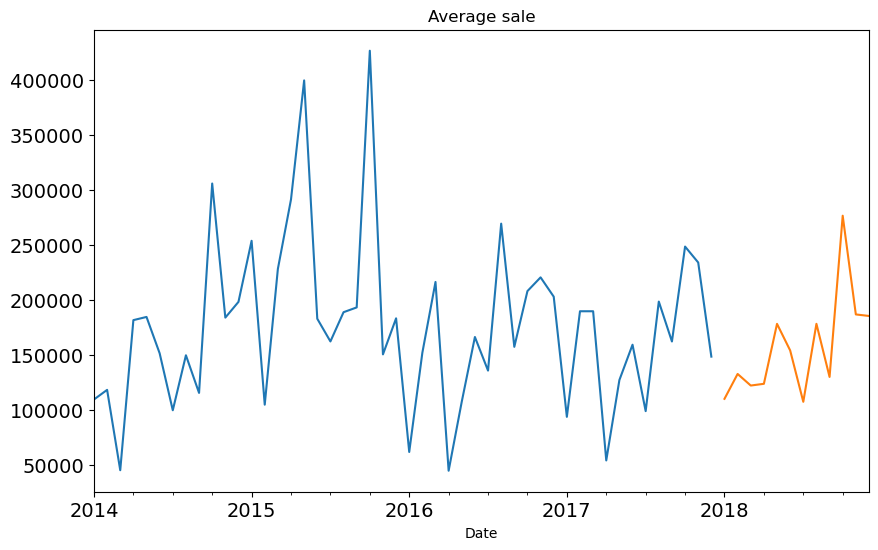

In [169]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=Gamma
fit1=ExponentialSmoothing(y_PB,seasonal_periods=12,
                         trend='add',
                         seasonal='add').fit()
y_predictions_PB=fit1.forecast(steps=12)

y_PB.plot(figsize=(10,6),title='Average sale',fontsize=14)
y_predictions_PB.plot(figsize=(10,6),title='Average sale',fontsize=14)
plt.show()

In [168]:
y_predictions_PB

2018-01-31    110114.765498
2018-02-28    132727.344251
2018-03-31    122190.290294
2018-04-30    123764.345816
2018-05-31    178242.445402
2018-06-30    154095.162093
2018-07-31    107401.532196
2018-08-31    178286.552754
2018-09-30    130018.063501
2018-10-31    276522.699667
2018-11-30    186811.060115
2018-12-31    185421.973707
Freq: M, dtype: float64

###  Uttar pradesh

In [170]:
model_UP = pm.auto_arima(y_UP,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1374.811, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1342.989, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1332.389, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1372.824, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1348.508, Time=0.03 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1330.326, Time=0.11 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1328.468, Time=0.05 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1330.411, Time=0.12 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1354.863, Time=0.06 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=1330.301, Time=0.10 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=1334.143, Time=0.10 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=1333.290, Time=0.27 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1326.212, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12]

In [171]:
from statsmodels.tsa.arima.model import ARIMA
model_UP = ARIMA(y_UP,
                order=(0,1,1),seasonal_order=(1,0,0,12)).fit()

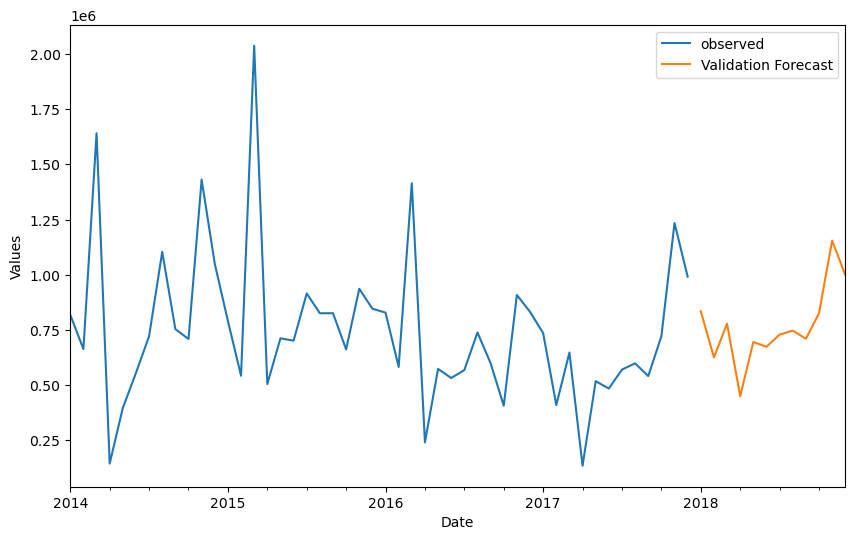

In [172]:

pred_UP = model_UP.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y_UP['2014':].plot(label='observed')
pred_UP.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

In [173]:
pred_UP.predicted_mean

2018-01-31    8.340530e+05
2018-02-28    6.247063e+05
2018-03-31    7.776924e+05
2018-04-30    4.481901e+05
2018-05-31    6.941801e+05
2018-06-30    6.727458e+05
2018-07-31    7.280094e+05
2018-08-31    7.460890e+05
2018-09-30    7.090949e+05
2018-10-31    8.248514e+05
2018-11-30    1.154683e+06
2018-12-31    9.984408e+05
Freq: M, Name: predicted_mean, dtype: float64

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


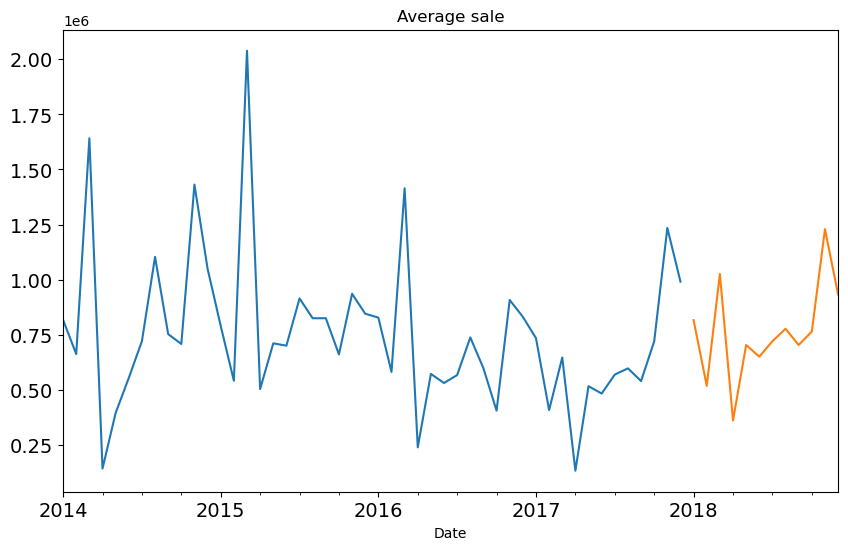

In [174]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=Gamma
fit1=ExponentialSmoothing(y_UP,seasonal_periods=12,
                         trend='add',
                         seasonal='add').fit()
y_predictions_UP=fit1.forecast(steps=12)

y_UP.plot(figsize=(10,6),title='Average sale',fontsize=14)
y_predictions_UP.plot(figsize=(10,6),title='Average sale',fontsize=14)
plt.show()

In [175]:
y_predictions_UP

2018-01-31    8.162198e+05
2018-02-28    5.184309e+05
2018-03-31    1.025782e+06
2018-04-30    3.611718e+05
2018-05-31    7.034618e+05
2018-06-30    6.505490e+05
2018-07-31    7.207733e+05
2018-08-31    7.771176e+05
2018-09-30    7.036485e+05
2018-10-31    7.647453e+05
2018-11-30    1.229274e+06
2018-12-31    9.330774e+05
Freq: M, dtype: float64

### uttarakhand

In [176]:
model_UK = pm.auto_arima(y_UK,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1050.041, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1047.854, Time=0.27 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1046.005, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1171.615, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1049.030, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1047.874, Time=0.08 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1043.783, Time=0.12 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1045.729, Time=0.24 sec
 ARIMA(0,0,1)(0,0,3)[12] intercept   : AIC=1044.851, Time=0.39 sec
 ARIMA(0,0,1)(1,0,3)[12] intercept   : AIC=1046.813, Time=0.49 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1044.716, Time=0.11 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=1045.457, Time=0.22 sec
 ARIMA(0,0,2)(0,0,2)[12] intercept   : AIC=1046.135, Time=0.23 sec
 ARIMA(1,0,0)(0,0,2)[12] intercept   : AIC=1045.789, Time=0.19 sec
 ARIMA(1,0,2)(0,0,2

In [178]:
from statsmodels.tsa.arima.model import ARIMA
model_UK = ARIMA(y_UK,
                order=(0,0,1),seasonal_order=(0,0,2,12)).fit()

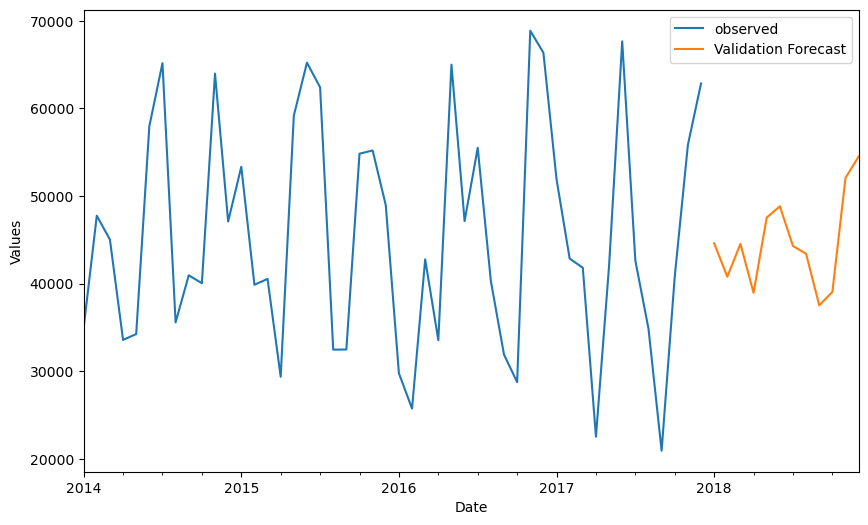

In [179]:

pred_UK = model_UK.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y_UK['2014':].plot(label='observed')
pred_UK.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Values')
plt.legend()
plt.show()

In [180]:
pred_UK.predicted_mean

2018-01-31    44603.310044
2018-02-28    40796.053529
2018-03-31    44540.519055
2018-04-30    38952.670254
2018-05-31    47547.443704
2018-06-30    48832.677273
2018-07-31    44300.331263
2018-08-31    43410.217268
2018-09-30    37527.204640
2018-10-31    39056.527563
2018-11-30    52077.616287
2018-12-31    54521.747729
Freq: M, Name: predicted_mean, dtype: float64

C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


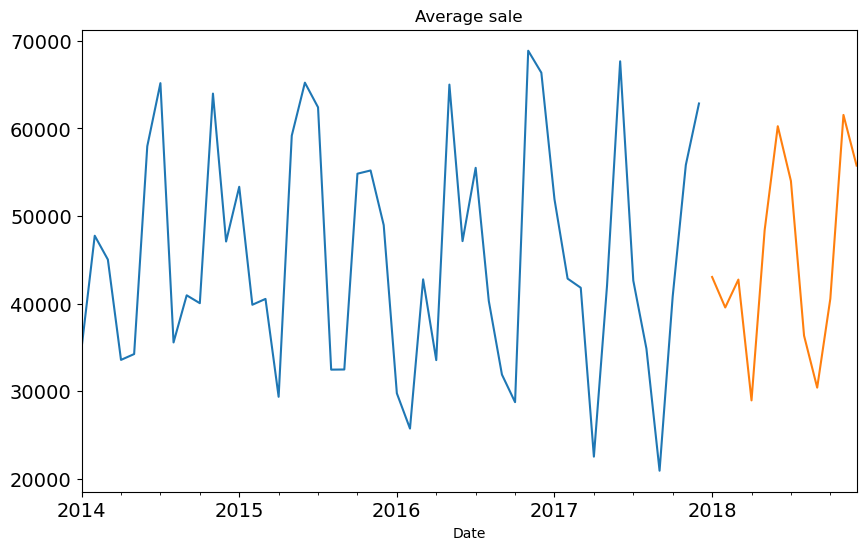

In [181]:
from statsmodels.tsa.api import ExponentialSmoothing

#seasonalperiods=Gamma
fit1=ExponentialSmoothing(y_UK,seasonal_periods=12,
                         trend='add',
                         seasonal='add').fit()
y_predictions_UK=fit1.forecast(steps=12)

y_UK.plot(figsize=(10,6),title='Average sale',fontsize=14)
y_predictions_UK.plot(figsize=(10,6),title='Average sale',fontsize=14)
plt.show()

In [182]:
y_predictions_UK

2018-01-31    43047.833666
2018-02-28    39565.143408
2018-03-31    42748.806747
2018-04-30    28956.320288
2018-05-31    48388.227011
2018-06-30    60261.081246
2018-07-31    54005.954107
2018-08-31    36348.243414
2018-09-30    30412.446571
2018-10-31    40566.889485
2018-11-30    61544.933309
2018-12-31    55762.311425
Freq: M, dtype: float64